Plot validations curve for each model. Training model and get an average accuracy / matrix confusion.

Configuration : 

In [7]:
import numpy as np
import sys
import math
import random
import Model
import Utils
import DataManager as DM  

Loading the database :


In [8]:
print("Loading Database...")
dm = DM.DataManager(5000, 500, normalisation=False)
x_train, t_train, x_test, t_test = dm.generer_donnees()
print("Done")

Loading Database...
Done


Initialize the analyzer

In [9]:
analyzer = Utils.ModelAnalyzer()
x = x_train
t = t_train

In [10]:
# Number of training to do per model
k = 10

Hyperparameters of the model Perceptron (model1) :
alpha(reg) : 10^-6 to 10^1 log scale

model Perceptron
The param is :  alpha
The param range is :  [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]
The train scores means are :  [0.34149888 0.26138623 0.23934139 0.18920012 0.16040474 0.1423505
 0.14250042 0.14250042]
The train scores std are :  [0.03254349 0.05013757 0.03318798 0.03646155 0.0194442  0.00208577
 0.00178608 0.00178608]
The test scores means are :  [0.33858755 0.25845011 0.23483107 0.18479229 0.15738483 0.14159599
 0.142598   0.142598  ]
The test scores std are :  [0.03639786 0.04782856 0.02953446 0.03533312 0.01719023 0.00367257
 0.00167914 0.00167914]
0
Best alpha for the Perceptron is  1e-06


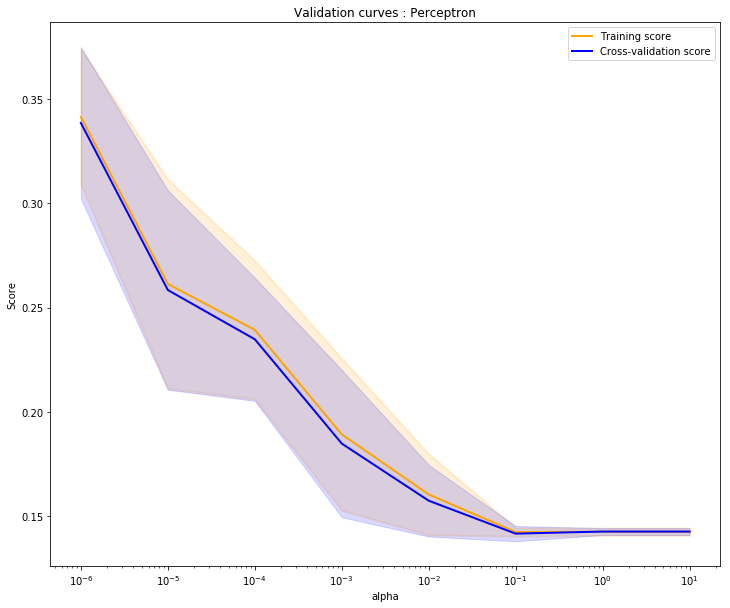

In [11]:
print("model Perceptron")

model1 = Model.Perceptron(reg_penalty='l2', reg=0.001)
para_range = np.logspace(-6, 1, 8)
titleVC = "Validation curves : Perceptron"
plt, test_scores_alpha_means = analyzer.plotValidationCurve(model1.model, x, t, title=titleVC, param_name="alpha",param_range=para_range, verbose=True, scaling="log")
    
bestInd = np.argmax(test_scores_alpha_means)
print(bestInd)
    
model1Alpha = para_range[bestInd]
print("Best alpha for the Perceptron is ", model1Alpha)
plt.rcParams['figure.figsize'] = [24.0, 20.0]
plt.show()

Training of the model Perceptron  :

In [12]:
# Set hyperparameters of the Perceptron model 
hyp1Mod1 = model1Alpha
print("Training with the parameter (alpha) :", hyp1Mod1)

bestAccuMod1 = 0
bestConfMaxMod1 = 0
bestModel1 =  0

# Training
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " Perceptron model")
    md1 = Model.Perceptron(reg_penalty='l2', reg=hyp1Mod1, random_state=i)
    md1.train(x_train, t_train)
    predictions_test = np.array([md1.prediction(x) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)
    
    if accu[i] > bestAccuMod1:
        bestAccuMod1 = accu[i]
        bestModel1 = md1
        bestConfMaxMod1 = analyzer.confusionMatrix(t_test, predictions_test)

# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod1)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod1)


Training with the parameter (alpha) : 1e-06
Training  1  Perceptron model
Training  2  Perceptron model
Training  3  Perceptron model
Training  4  Perceptron model
Training  5  Perceptron model
Training  6  Perceptron model
Training  7  Perceptron model
Training  8  Perceptron model
Training  9  Perceptron model
Training  10  Perceptron model
[0.288 0.3   0.38  0.394 0.404 0.352 0.17  0.416 0.396 0.35 ]
The average accuracy is :  0.34500000000000003
The std accuracu is :  0.07121937938510838
The best accuracy is :  0.416
The confusion matrix of the best model : 
[[ 0  0  0  1  4  1 71]
 [ 0  4  1  2  1  0 53]
 [ 0 13 19 23  2 18  2]
 [ 0  0  1 73  1  6  0]
 [ 0 13  0  2  9  1 36]
 [ 0  3 14 13  3 31  7]
 [ 0  0  0  0  0  0 72]]


Rbf ou poly ??

Hyperparameters of the model SVM(model 3)(rbf) :
 C : 10^-3 to 10^3 log scale

The param is :  C
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.15300003 0.15300003 0.15300003 1.         1.         1.
 1.        ]
The train scores std are :  [6.40113651e-05 6.40113651e-05 6.40113651e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
The test scores means are :  [0.15300043 0.15300043 0.15300043 0.15300043 0.15300043 0.15300043
 0.15300043]
The test scores std are :  [0.00025591 0.00025591 0.00025591 0.00025591 0.00025591 0.00025591
 0.00025591]
0
Best c is :  0.001


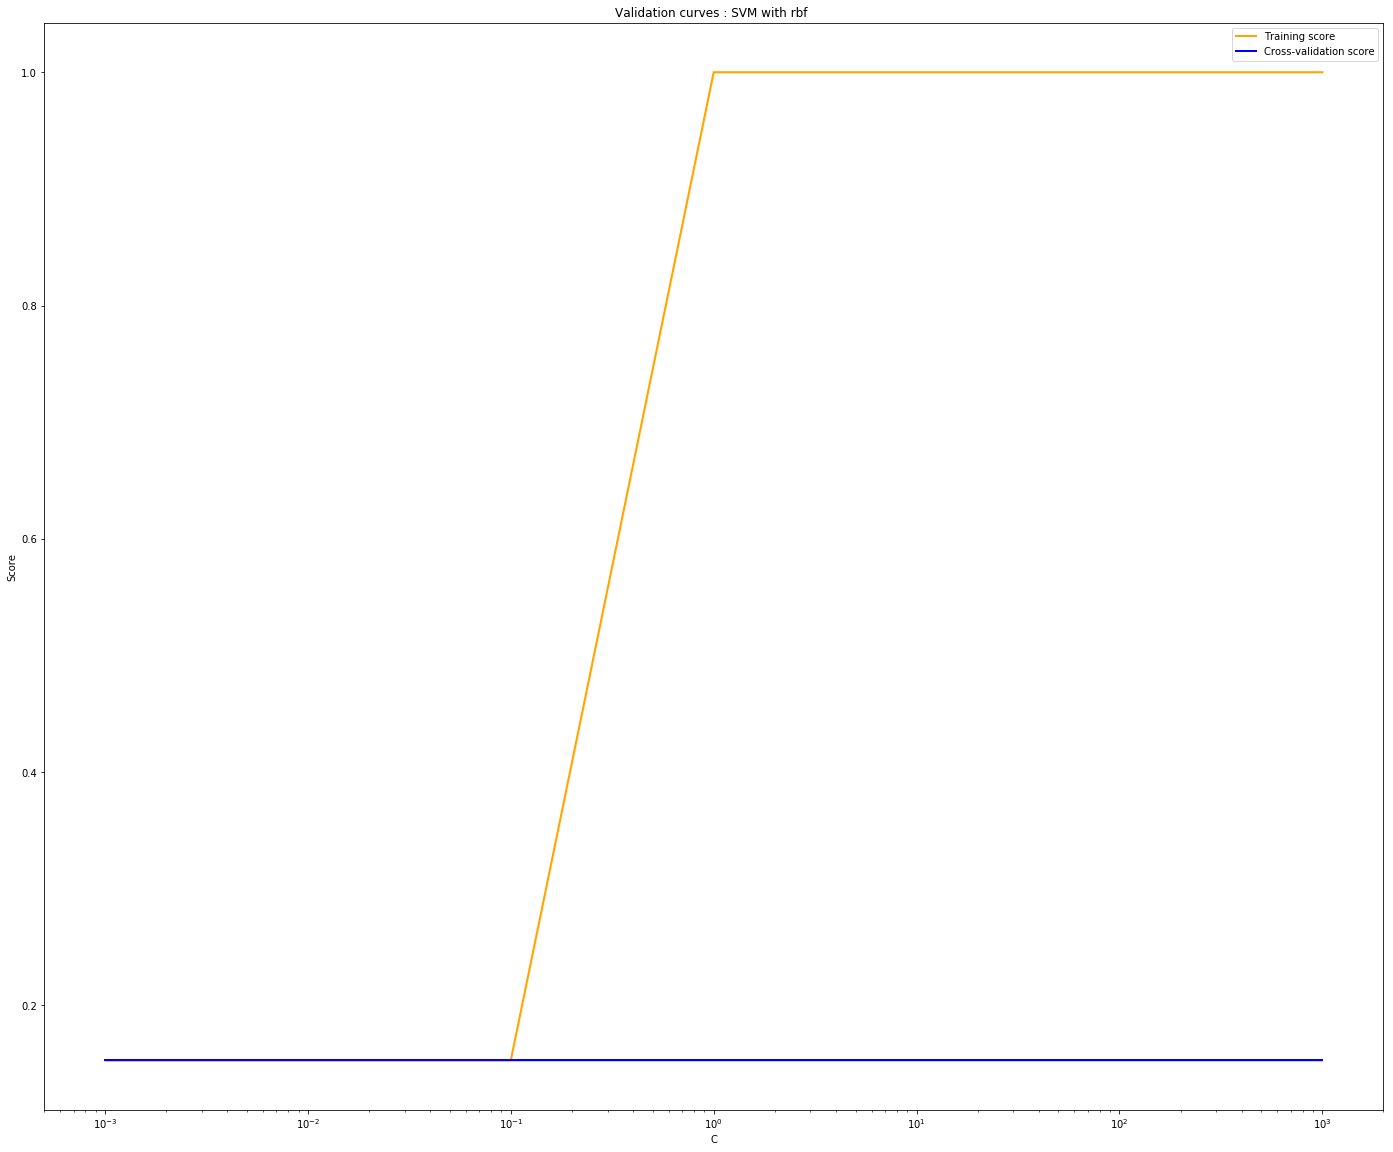

In [13]:
bestCMod3 = 1

model3 = Model.ModelSVM(gamma="auto",  kernel="rbf")
para_range = np.logspace(-3, 3, 7)
titleVC = "Validation curves : SVM with rbf "
plt, test_scores_deg_means = analyzer.plotValidationCurve(model3.model, x, t, title=titleVC, param_name="C",param_range=para_range, verbose=True, scaling="log")
    
bestInd = np.argmax(test_scores_deg_means)
print(bestInd)
    
model3Reg = para_range[bestInd]
print("Best c is : ",model3Reg)
    
plt.show()
    

Training of the model SVM (model 3) :

In [14]:
# Set hyperparameters of the SVM model
hyp2Mod3 = model3Reg
print("Training with the parameters (C) :", hyp2Mod3)

bestAccuMod3 = 0
bestConfMaxMod3 = 0
bestModel3 =  0

# Training
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " model SVM with rbf...")
    md3 = Model.ModelSVM(gamma="auto",  kernel="rbf", reg=hyp2Mod3, random_state=i)
    md3.train(x_train, t_train)
    predictions_test = np.array([md3.prediction(x) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)
    
    if accu[i] > bestAccuMod3:
        bestAccuMod3 = accu[i]
        bestModel3 = md3
        bestConfMaxMod3 = analyzer.confusionMatrix(t_test, predictions_test)


# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod3)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod3)


Training with the parameters (C) : 1
Training  1  model SVM with rbf...
Training  2  model SVM with rbf...
Training  3  model SVM with rbf...
Training  4  model SVM with rbf...
Training  5  model SVM with rbf...
Training  6  model SVM with rbf...
Training  7  model SVM with rbf...
Training  8  model SVM with rbf...
Training  9  model SVM with rbf...
Training  10  model SVM with rbf...
[0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144]
The average accuracy is :  0.14399999999999996
The std accuracu is :  2.7755575615628914e-17
The best accuracy is :  0.144
The confusion matrix of the best model : 
[[ 0  0  0  0  0  0 77]
 [ 0  0  0  0  0  0 61]
 [ 0  0  0  0  0  0 77]
 [ 0  0  0  0  0  0 81]
 [ 0  0  0  0  0  0 61]
 [ 0  0  0  0  0  0 71]
 [ 0  0  0  0  0  0 72]]


Hyperparameters of the model data tree classifier (model 4) : criterion= 'gini' or 'entropy' and max depth = 2 to 40

The param is :  max_depth
The param range is :  [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 39. 40.]
The train scores means are :  [0.48960105 0.60944982 0.65545116 0.68485261 0.71975023 0.75904911
 0.79154851 0.82869714 0.86449676 0.89614751 0.92204757 0.94509747
 0.96334873 0.97489871 0.98424938 0.98939986 0.9926502  0.99480001
 0.99670014 0.99795006 0.99869999 0.99910004 0.99935005 0.99950005
 0.99970004 0.99980005 0.99990002 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
The train scores std are :  [0.00461448 0.00565498 0.00357148 0.00850797 0.0090632  0.00793612
 0.00806872 0.01119922 0.00985673 0.00772336 0.00669788 0.00633007
 0.0033704  0.0033955  0.00284428 0.00323499 0.00236351 0.00205722
 0.0021288  0.00159949 0.00123869 0.00087441 0.00084538 0.0007744
 0.00048464 0.0003999  0.00019995 0.         0

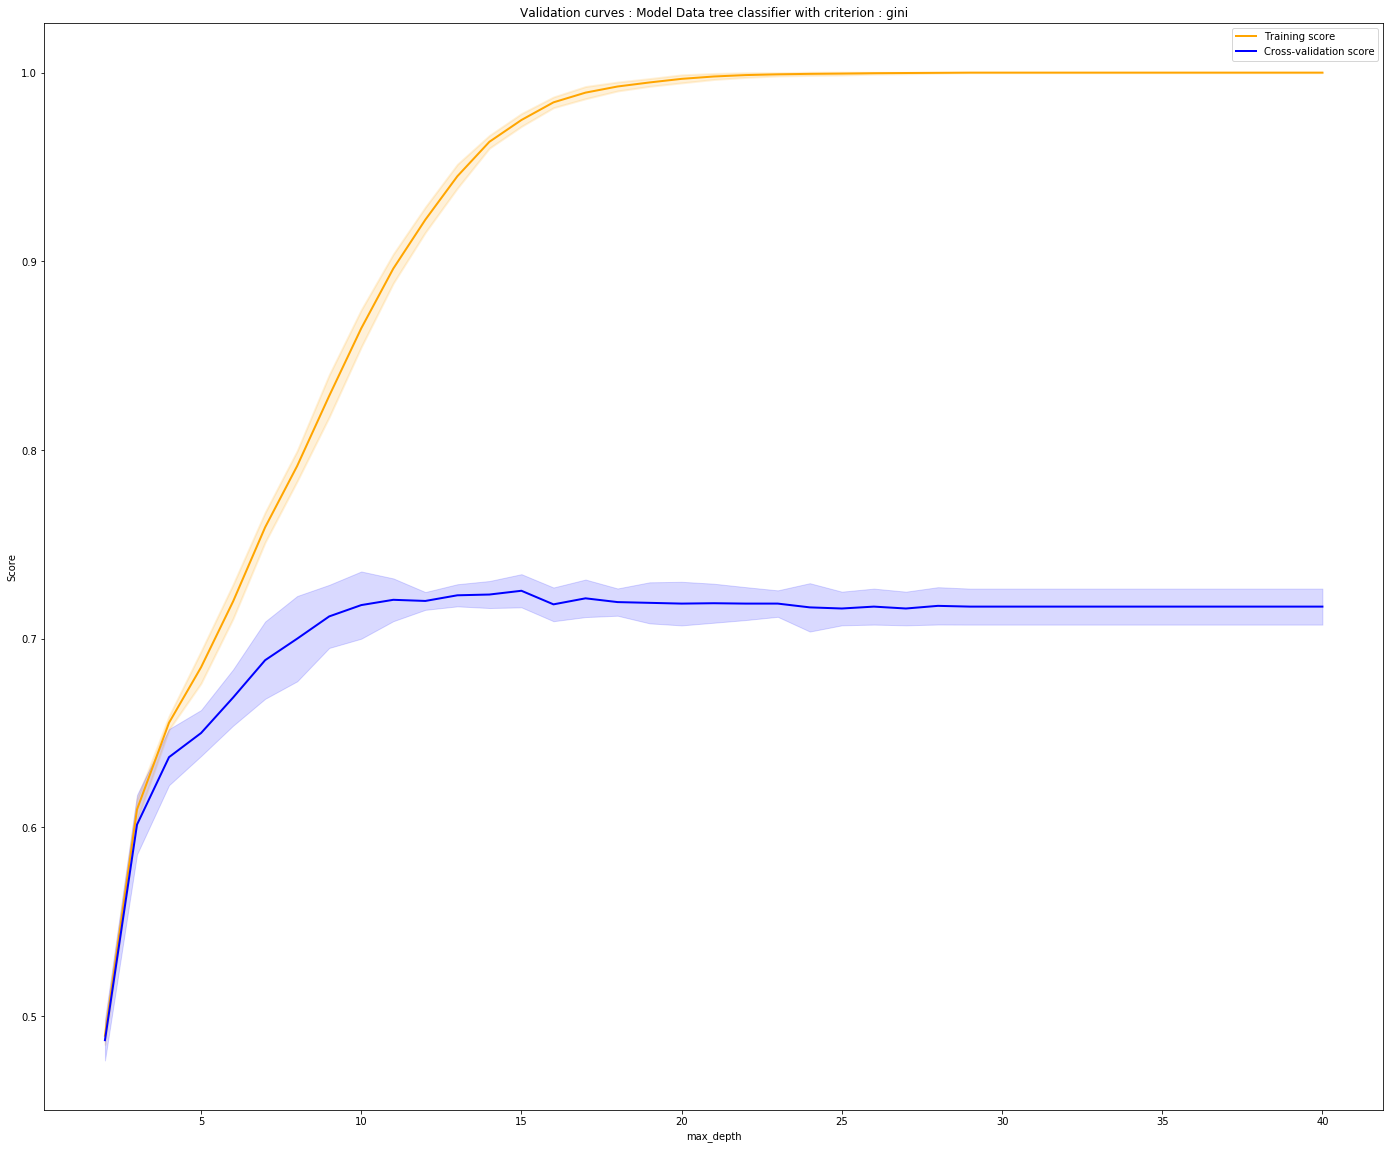

The param is :  max_depth
The param range is :  [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 39. 40.]
The train scores means are :  [0.48960105 0.60944982 0.65545116 0.68485261 0.71975023 0.75904911
 0.79154851 0.82869714 0.86449676 0.89614751 0.92204757 0.94509747
 0.96334873 0.97489871 0.98424938 0.98939986 0.9926502  0.99480001
 0.99670014 0.99795006 0.99869999 0.99910004 0.99935005 0.99950005
 0.99970004 0.99980005 0.99990002 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
The train scores std are :  [0.00461448 0.00565498 0.00357148 0.00850797 0.0090632  0.00793612
 0.00806872 0.01119922 0.00985673 0.00772336 0.00669788 0.00633007
 0.0033704  0.0033955  0.00284428 0.00323499 0.00236351 0.00205722
 0.0021288  0.00159949 0.00123869 0.00087441 0.00084538 0.0007744
 0.00048464 0.0003999  0.00019995 0.         0

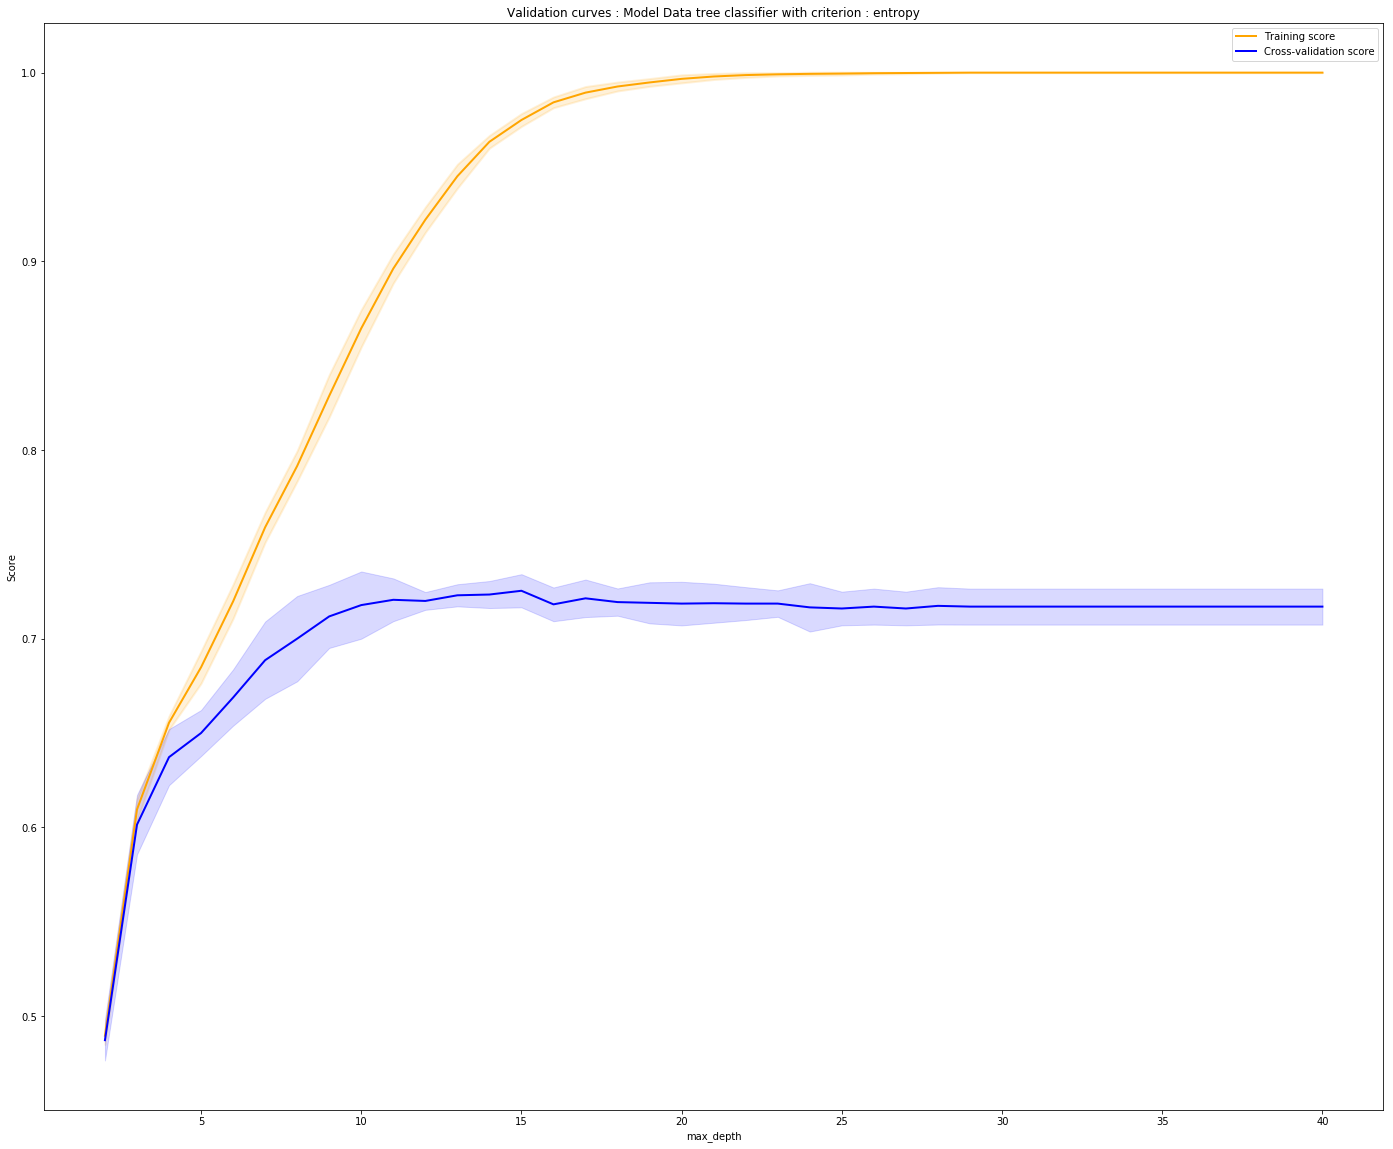

The best parameter are (criterion, max_depth) : gini 15.0


In [15]:
bestCritMod4 = 'gini'
bestMaxDepthMod4 = 2
bestTestScore = float('inf')
dicCriteria = ['gini', 'entropy']

for cri in dicCriteria:
    para_range = np.linspace(2, 40, 39)
    titleVC = "Validation curves : Model Data tree classifier with criterion : " + cri
    model4 = Model.ModelDecisionTree()
    plt, test_scores_means_md = analyzer.plotValidationCurve(model4.model, x, t, title=titleVC, param_name="max_depth",param_range=para_range, verbose=True, scaling="lin")
    
    bestInd = np.argmax(test_scores_means_md)
    print(bestInd)
    model4Maxdepth = para_range[bestInd]
    
    print("Best maxdepth with criterion ", cri ," is : ",model4Maxdepth)
    plt.show()    
    
    if test_scores_means_md[bestInd] < bestTestScore:
        bestTestScore = test_scores_means_md[bestInd]
        bestCritMod4 = cri
        bestMaxDepthMod4 = model4Maxdepth
        
print("The best parameter are (criterion, max_depth) :", bestCritMod4, bestMaxDepthMod4)

Training of the model Data tree classifier :

In [16]:
# Set hyperparameters of the model data tree classifier
hyp1Mod4 = bestCritMod4
hyp2Mod4 = bestMaxDepthMod4

bestAccuMod4 = 0
bestConfMaxMod4 = 0
bestModel4 =  0

# Training 
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " model data tree classifier...")
    md4 = Model.ModelDecisionTree(max_depth=hyp2Mod4, criterion=hyp1Mod4, random_state=i)
    md4.train(x_train, t_train)
    predictions_test = np.array([md4.prediction(x.reshape(1, -1)) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)

    if accu[i] > bestAccuMod4:
        bestAccuMod4 = accu[i]
        bestModel4 = md4
        bestConfMaxMod4 = analyzer.confusionMatrix(t_test, predictions_test)

    
# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod4)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod4)


Training  1  model data tree classifier...
Training  2  model data tree classifier...
Training  3  model data tree classifier...
Training  4  model data tree classifier...
Training  5  model data tree classifier...
Training  6  model data tree classifier...
Training  7  model data tree classifier...
Training  8  model data tree classifier...
Training  9  model data tree classifier...
Training  10  model data tree classifier...
[0.71  0.7   0.716 0.708 0.708 0.71  0.696 0.704 0.702 0.708]
The average accuracy is :  0.7061999999999999
The std accuracu is :  0.005473572873361608
The best accuracy is :  0.716
The confusion matrix of the best model : 
[[46 17  0  0  3  0 11]
 [15 33  2  0  8  3  0]
 [ 0  2 45  9  1 20  0]
 [ 0  0  5 72  0  4  0]
 [ 1  9  0  0 50  1  0]
 [ 0  0 15  8  1 47  0]
 [ 5  2  0  0  0  0 65]]


Hyperparameters of the Logistic Regression (Model 5) : C : 10^-5 to 10^5

Validation curve Logistic Regression (model 5)
The param is :  C
The param range is :  [1.00000000e-05 4.64158883e-04 2.15443469e-02 1.00000000e+00
 4.64158883e+01 2.15443469e+03 1.00000000e+05]
The train scores means are :  [0.5141506  0.59314975 0.65374941 0.68090093 0.67710067 0.68085022
 0.67625124]
The train scores std are :  [0.00540042 0.00513004 0.00401152 0.00615209 0.00286677 0.00370516
 0.00353645]
The test scores means are :  [0.51259942 0.58439303 0.64658621 0.66579067 0.66518826 0.66658887
 0.66299445]
The test scores std are :  [0.0171966  0.01450039 0.01922078 0.01248993 0.01148515 0.0119234
 0.01132385]
5
Best C for the logistic Regression is  2154.4346900318865


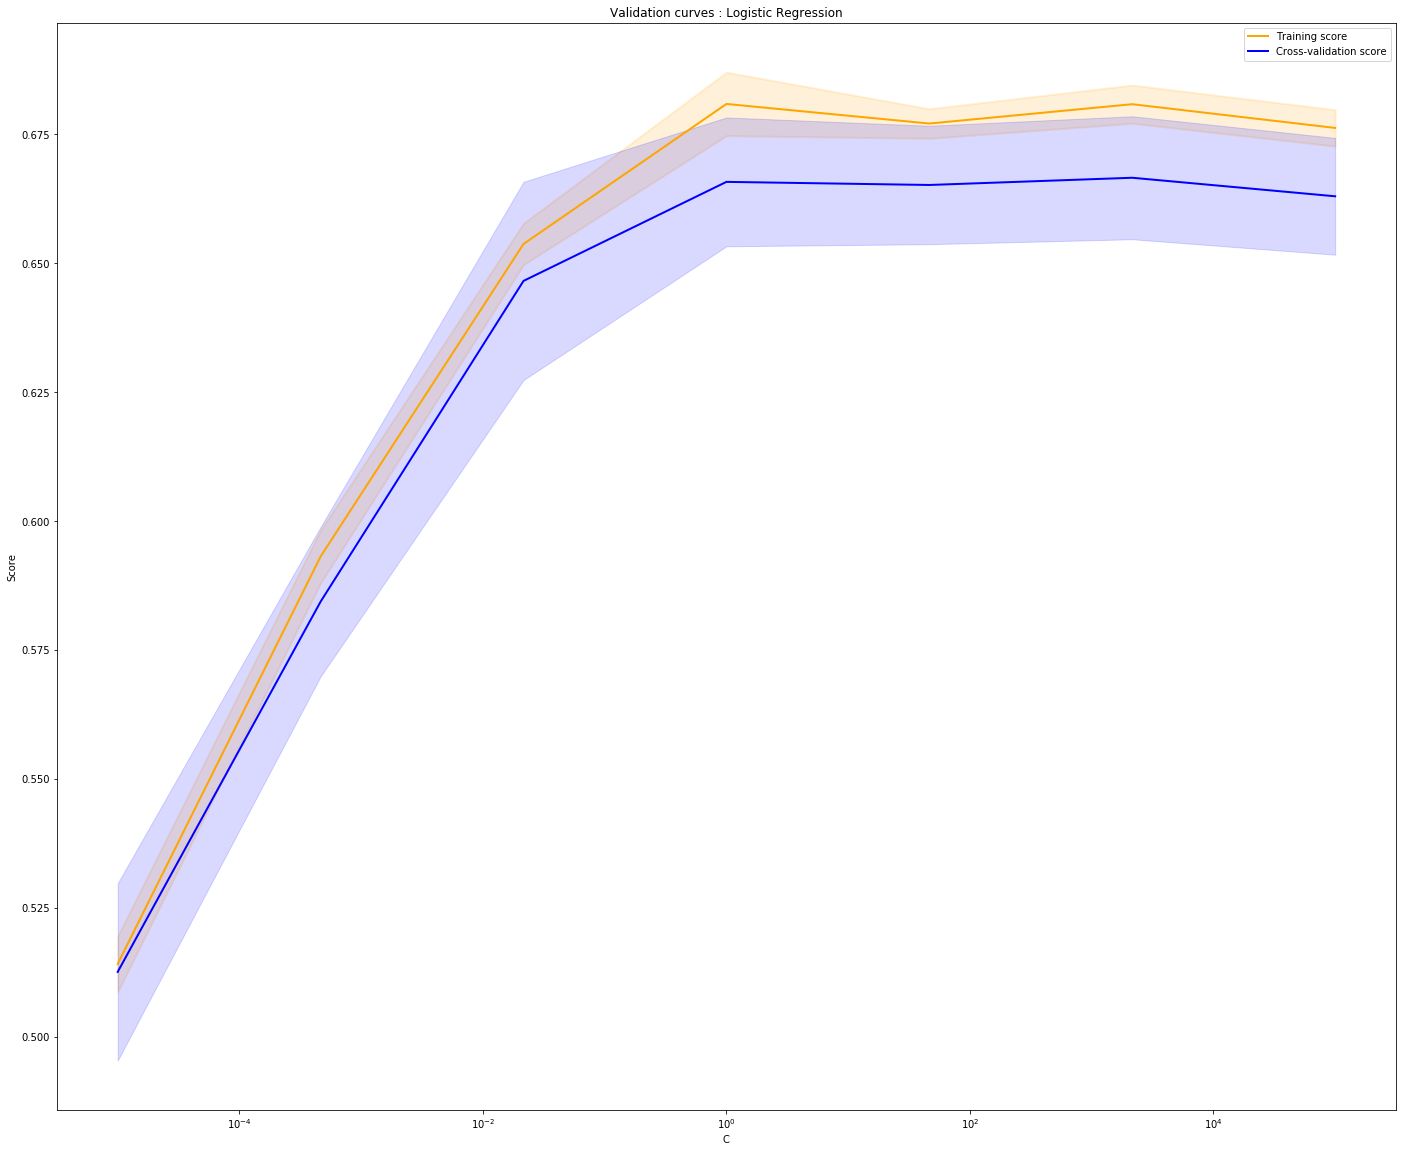

In [17]:
print("Validation curve Logistic Regression (model 5)")

model5 = Model.LogisticRegression(reg_penalty='l2', reg_inv=1.0)
para_range = np.logspace(-5, 5, 7)
titleVC = "Validation curves : Logistic Regression"
plt, test_scores_C_means = analyzer.plotValidationCurve(model5.model, x, t, title=titleVC, param_name="C",param_range=para_range, verbose=True, scaling="log")

bestInd = np.argmax(test_scores_C_means)
print(bestInd)
    
model5C = para_range[bestInd]
print("Best C for the logistic Regression is ", model5C)
    
plt.show()

Training of the Logistic Regression (Model 5) :

In [18]:
# Set hyperparameters of the Logistic Regression (Model 5)
hyp1Mod5 = model5C

bestAccuMod5 = 0
bestConfMaxMod5 = 0
bestModel5 =  0

#Training
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " model Logistic Regression...")
    md5 = Model.LogisticRegression(reg_penalty='l2', reg_inv=hyp1Mod5, random_state=i)
    md5.train(x_train, t_train)
    predictions_test = np.array([md5.prediction(x) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)
    if accu[i] > bestAccuMod5:
        bestAccuMod5 = accu[i]
        bestModel5 = md5
        bestConfMaxMod5 = analyzer.confusionMatrix(t_test, predictions_test)


# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod5)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod5)


Training  1  model Logistic Regression...
Training  2  model Logistic Regression...
Training  3  model Logistic Regression...
Training  4  model Logistic Regression...
Training  5  model Logistic Regression...
Training  6  model Logistic Regression...
Training  7  model Logistic Regression...
Training  8  model Logistic Regression...
Training  9  model Logistic Regression...
Training  10  model Logistic Regression...
[0.656 0.656 0.656 0.656 0.656 0.656 0.656 0.656 0.656 0.656]
The average accuracy is :  0.6559999999999999
The std accuracu is :  1.1102230246251565e-16
The best accuracy is :  0.656
The confusion matrix of the best model : 
[[43 11  0  0  8  1 14]
 [13 29  0  0 14  5  0]
 [ 0  0 36 12  6 23  0]
 [ 0  0  5 70  0  6  0]
 [ 0 10  4  0 45  2  0]
 [ 0  1 14  6  5 45  0]
 [ 9  2  0  0  1  0 60]]


Training of the model Bagging (model 6) :

Bagging with Peceptron

In [19]:
# Setting up base model

#list_model = ['Perceptron', 'ModelSVM', 'ModelDecisionTree', 'LogisticRegression']
#  'MLPerceptron' 
base_model = 'Perceptron'
number_model = [10, 25]  #  changer 10 25 
bestAccuMod6 = 0
bestConfMaxMod6 = 0
bestModel6 =  0

# Training 
accu = np.zeros(k)

for nb in number_model:
    bestAccuMod6BP = 0
    bestConfMaxMod6BP = 0
    bestModel6BP =  0
    print("(base model, numbermodel) = ", base_model, number_model)
    for j in range(k):
        print("Training ", j+1, " Bagging model" )
        md6 = Model.Bagging(base_model=base_model, number_model=nb, reg_penalty='l2', reg=hyp1Mod1, random_state=i)
        md6.train(x_train, t_train)
        predictions_test = np.array([md6.prediction(x) for x in x_test])

        accu[j] = analyzer.accuracy(t_test, predictions_test)
        if accu[j] > bestAccuMod6BP:
            bestAccuMod6BP = accu[j]
            bestModel6BP = md6
            bestConfMaxMod6BP = analyzer.confusionMatrix(t_test, predictions_test)
    
    # Average accuracy and  std accuracy
    print(accu)
    accuMean = np.mean(accu)
    accuStd = np.std(accu)
    print("The average accuracy is : ", accuMean)
    print("The std accuracu is : ", accuStd)
    print("The best accuracy is : ", bestAccuMod6BP)
    print("The confusion matrix of the best model : ")
    print(bestConfMaxMod6BP)

(base model, numbermodel) =  Perceptron [10, 25]
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Training  9  Bagging model
Training  10  Bagging model
[0.462 0.462 0.462 0.462 0.462 0.462 0.462 0.462 0.462 0.462]
The average accuracy is :  0.462
The std accuracu is :  0.0
The best accuracy is :  0.462
The confusion matrix of the best model : 
[[45 10  2  0 11  0  9]
 [24 15 11  0 10  0  1]
 [ 1  3 53  5  5 10  0]
 [ 0  0 18 58  3  2  0]
 [ 9  9 17  0 24  1  1]
 [ 3  5 36  9  7 11  0]
 [38  7  0  0  2  0 25]]
(base model, numbermodel) =  Perceptron [10, 25]
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Training  9  Bagging model
Training  10  Bagging mod

Bagging with SVM rbf:

In [20]:
# Setting up base model

#list_model = ['Perceptron', 'ModelSVM', 'ModelDecisionTree', 'LogisticRegression']
#  'MLPerceptron' 
base_model = 'ModelSVM'
number_model = [10, 25]  #  changer 10 25 
bestAccuMod6SVM = 0
bestConfMaxMod6SVM = 0
bestModel6SVM =  0

# Training 
accu = np.zeros(k)

for nb in number_model:
    bestAccuMod6SVM = 0
    bestConfMaxMod6SVM = 0
    bestModel6SVM =  0
    print("(base model, numbermodel) = ", base_model, number_model)
    for j in range(k):
        print("Training ", j+1, " Bagging model" )
        md6 = Model.Bagging(base_model=base_model, number_model=nb, kernel='rbf',reg_penalty='l2', reg=hyp2Mod3, random_state=i)
        md6.train(x_train, t_train)
        predictions_test = np.array([md6.prediction(x) for x in x_test])

        accu[j] = analyzer.accuracy(t_test, predictions_test)
        if accu[j] > bestAccuMod6SVM:
            bestAccuMod6SVM = accu[j]
            bestModel6SVM = md6
            bestConfMaxMod6SVM = analyzer.confusionMatrix(t_test, predictions_test)
    
    # Average accuracy and  std accuracy
    print(accu)
    accuMean = np.mean(accu)
    accuStd = np.std(accu)
    print("The average accuracy is : ", accuMean)
    print("The std accuracu is : ", accuStd)
    print("The best accuracy is : ", bestAccuMod6SVM)
    print("The confusion matrix of the best model : ")
    print(bestConfMaxMod6SVM)

(base model, numbermodel) =  ModelSVM [10, 25]
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Training  9  Bagging model
Training  10  Bagging model
[0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144]
The average accuracy is :  0.14399999999999996
The std accuracu is :  2.7755575615628914e-17
The best accuracy is :  0.144
The confusion matrix of the best model : 
[[ 0  0  0  0  0  0 77]
 [ 0  0  0  0  0  0 61]
 [ 0  0  0  0  0  0 77]
 [ 0  0  0  0  0  0 81]
 [ 0  0  0  0  0  0 61]
 [ 0  0  0  0  0  0 71]
 [ 0  0  0  0  0  0 72]]
(base model, numbermodel) =  ModelSVM [10, 25]
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Training  9  Bagging mo

Bagging with data tree classifier

In [21]:
# Setting up base model

#list_model = ['Perceptron', 'ModelSVM', 'ModelDecisionTree', 'LogisticRegression']
#  'MLPerceptron' 
base_model = 'ModelDecisionTree'
number_model = [10, 25]  #  changer 10 25 
bestAccuMod6MDC = 0
bestConfMaxMod6MDC = 0
bestModel6MDC =  0

# Training 
accu = np.zeros(k)

hyp1Mod4 = bestCritMod4
hyp2Mod4 = bestMaxDepthMod4

for nb in number_model:
    bestAccuMod6SVM = 0
    bestConfMaxMod6SVM = 0
    bestModel6SVM =  0
    print("(base model, numbermodel) = ", base_model, number_model)
    for j in range(k):
        print("Training ", j+1, " Bagging model" )
        md6 = Model.Bagging(base_model=base_model, number_model=nb,reg_penalty='l2', reg=hyp2Mod3, random_state=i)
        md6.train(x_train, t_train)
        predictions_test = np.array([md6.prediction(x) for x in x_test])

        accu[j] = analyzer.accuracy(t_test, predictions_test)
        if accu[j] > bestAccuMod6MDC:
            bestAccuMod6MDC = accu[j]
            bestModel6MDC = md6
            bestConfMaxMod6MDC = analyzer.confusionMatrix(t_test, predictions_test)
    
    # Average accuracy and  std accuracy
    print(accu)
    accuMean = np.mean(accu)
    accuStd = np.std(accu)
    print("The average accuracy is : ", accuMean)
    print("The std accuracu is : ", accuStd)
    print("The best accuracy is : ", bestAccuMod6MDC)
    print("The confusion matrix of the best model : ")
    print(bestConfMaxMod6MDC)

(base model, numbermodel) =  ModelDecisionTree [10, 25]
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Training  9  Bagging model
Training  10  Bagging model
[0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71 0.71]
The average accuracy is :  0.71
The std accuracu is :  0.0
The best accuracy is :  0.71
The confusion matrix of the best model : 
[[45 20  0  0  3  0  9]
 [16 34  2  0  6  3  0]
 [ 0  2 46  9  1 19  0]
 [ 0  0  6 72  0  3  0]
 [ 0 10  0  0 50  1  0]
 [ 0  1 16  9  1 44  0]
 [ 6  2  0  0  0  0 64]]
(base model, numbermodel) =  ModelDecisionTree [10, 25]
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Training  9  Bagging model
Training  10  Bagging m

Bagging with Logistic Regression

In [22]:
# Setting up base model

#list_model = ['Perceptron', 'ModelSVM', 'ModelDecisionTree', 'LogisticRegression']
#  'MLPerceptron' 
base_model = 'LogisticRegression'
number_model = [10, 25]  #  changer 10 25 

# Training 
accu = np.zeros(k)

for nb in number_model:
    bestAccuMod6LR = 0
    bestConfMaxMod6LR = 0
    bestModel6LR =  0
    print("(base model, numbermodel) = ", base_model, number_model)
    for j in range(k):
        print("Training ", j+1, " Bagging model" )
        md6 = Model.Bagging(base_model=base_model, number_model=nb, reg_penalty='l2', reg=hyp1Mod5, random_state=i)
        md6.train(x_train, t_train)
        predictions_test = np.array([md6.prediction(x) for x in x_test])

        accu[j] = analyzer.accuracy(t_test, predictions_test)
        if accu[j] > bestAccuMod6LR:
            bestAccuMod6LR = accu[j]
            bestModel6LR = md6
            bestConfMaxMod6LR = analyzer.confusionMatrix(t_test, predictions_test)
    
    # Average accuracy and  std accuracy
    print(accu)
    accuMean = np.mean(accu)
    accuStd = np.std(accu)
    print("The average accuracy is : ", accuMean)
    print("The std accuracu is : ", accuStd)
    print("The best accuracy is : ", bestAccuMod6LR)
    print("The confusion matrix of the best model : ")
    print(bestConfMaxMod6LR)

(base model, numbermodel) =  LogisticRegression [10, 25]
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Training  9  Bagging model
Training  10  Bagging model
[0.656 0.656 0.656 0.656 0.656 0.656 0.656 0.656 0.656 0.656]
The average accuracy is :  0.6559999999999999
The std accuracu is :  1.1102230246251565e-16
The best accuracy is :  0.656
The confusion matrix of the best model : 
[[43 11  0  0  8  1 14]
 [13 29  0  0 14  5  0]
 [ 0  0 36 12  6 23  0]
 [ 0  0  5 70  0  6  0]
 [ 0 10  4  0 45  2  0]
 [ 0  1 14  6  5 45  0]
 [ 9  2  0  0  1  0 60]]
(base model, numbermodel) =  LogisticRegression [10, 25]
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Trai

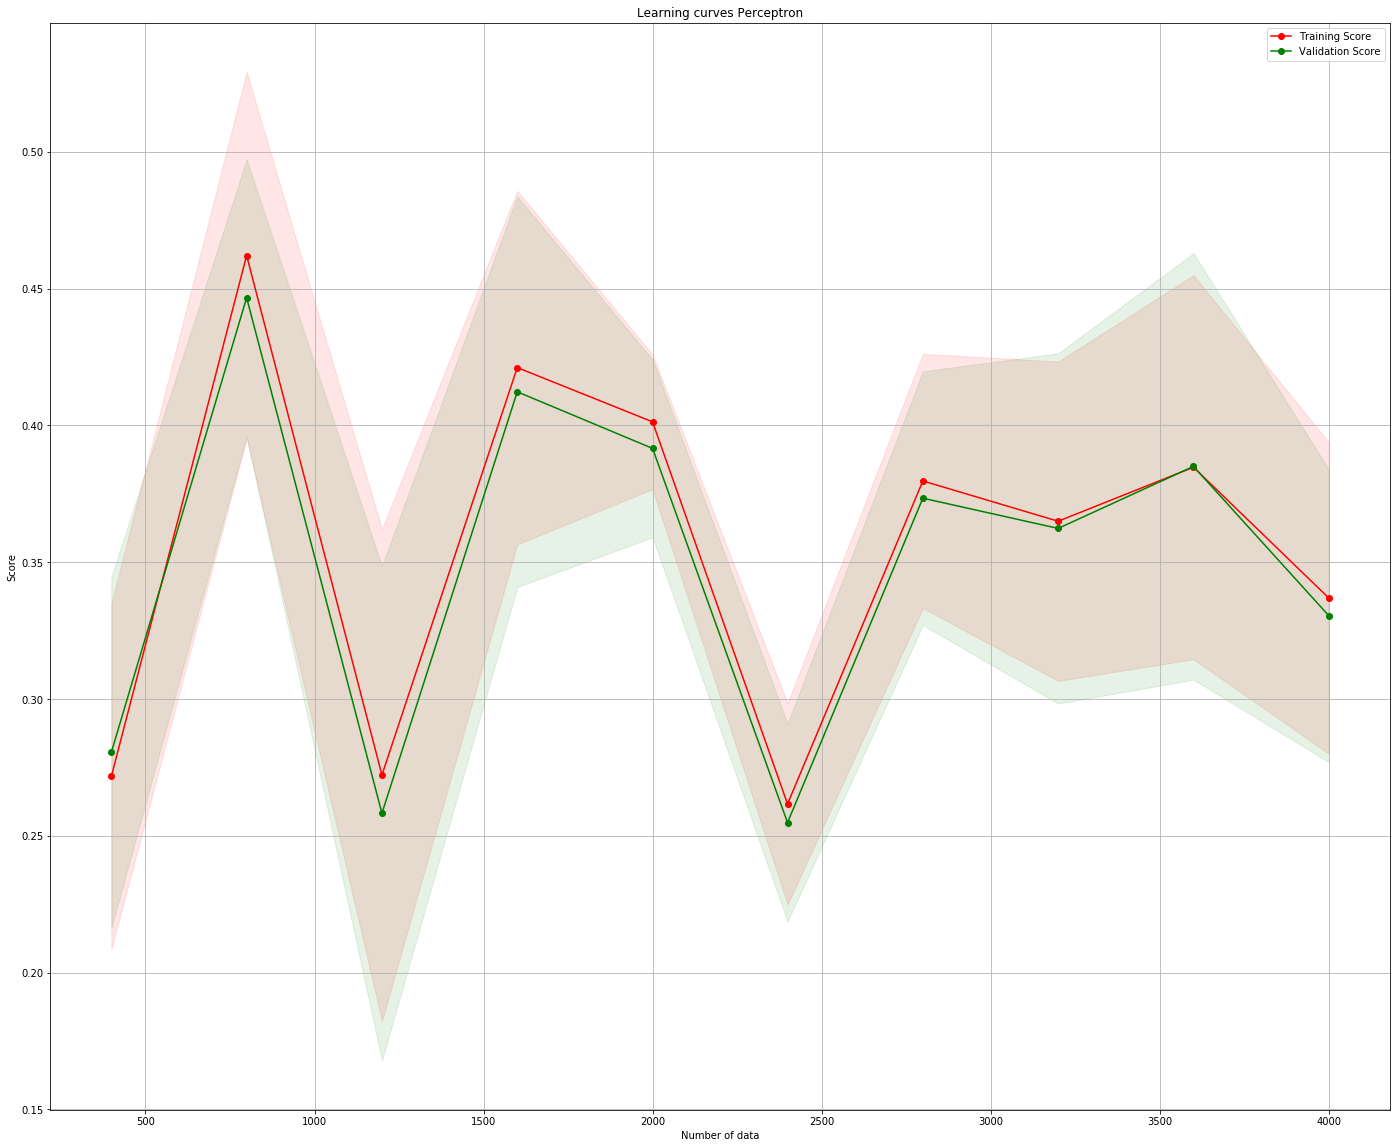

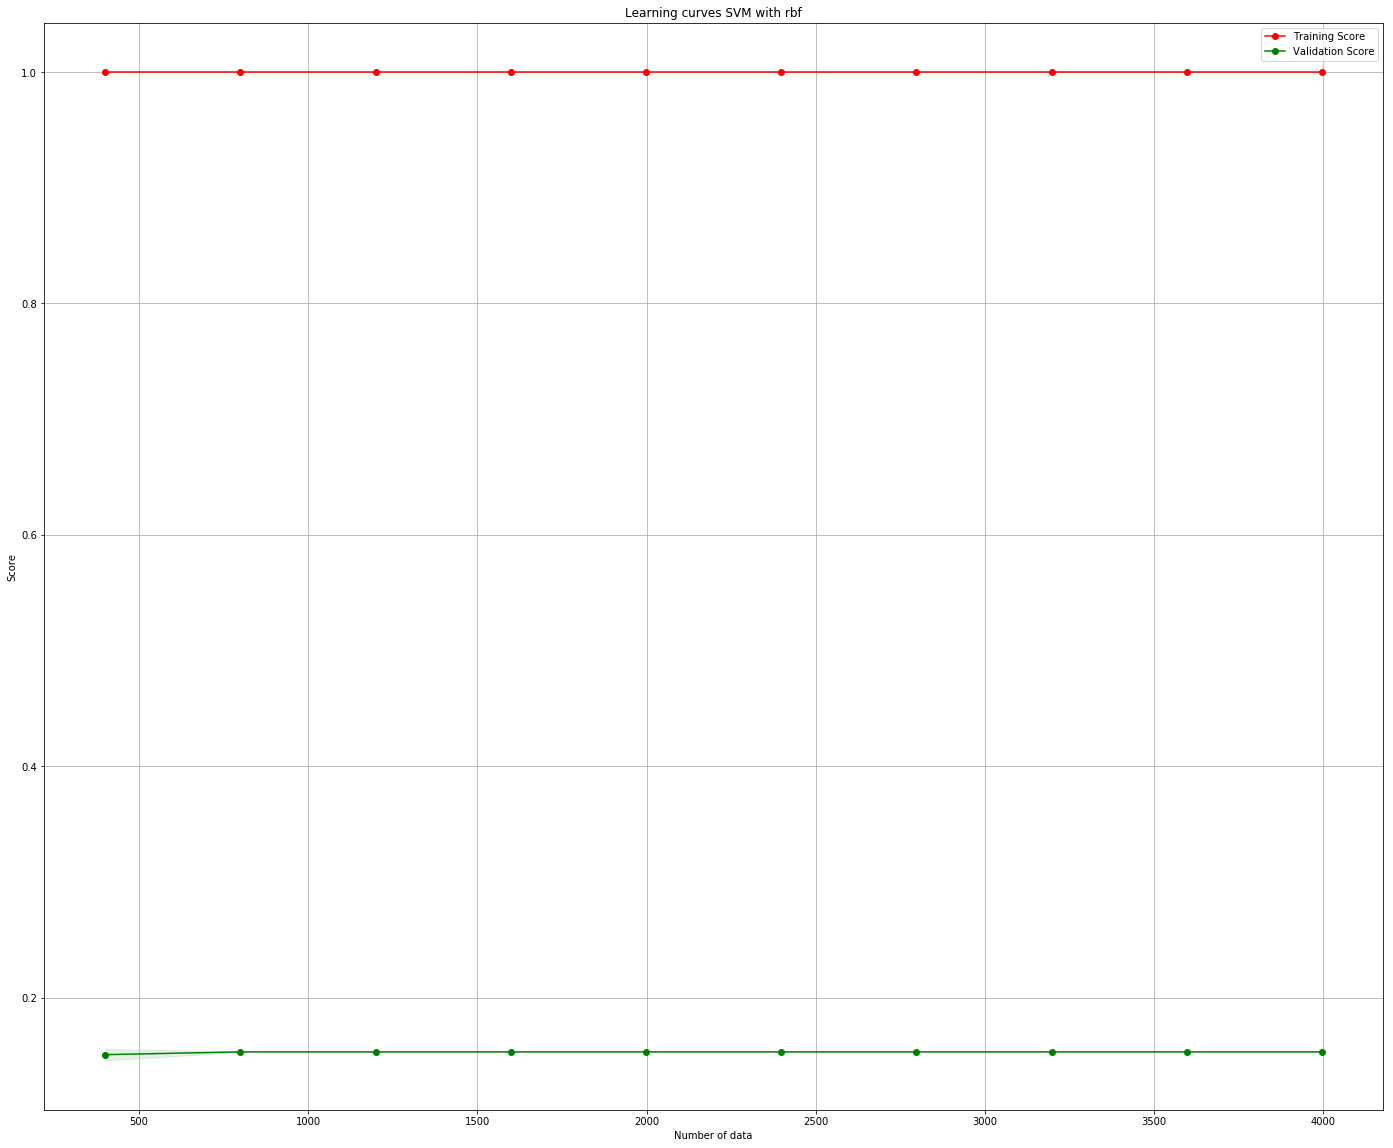

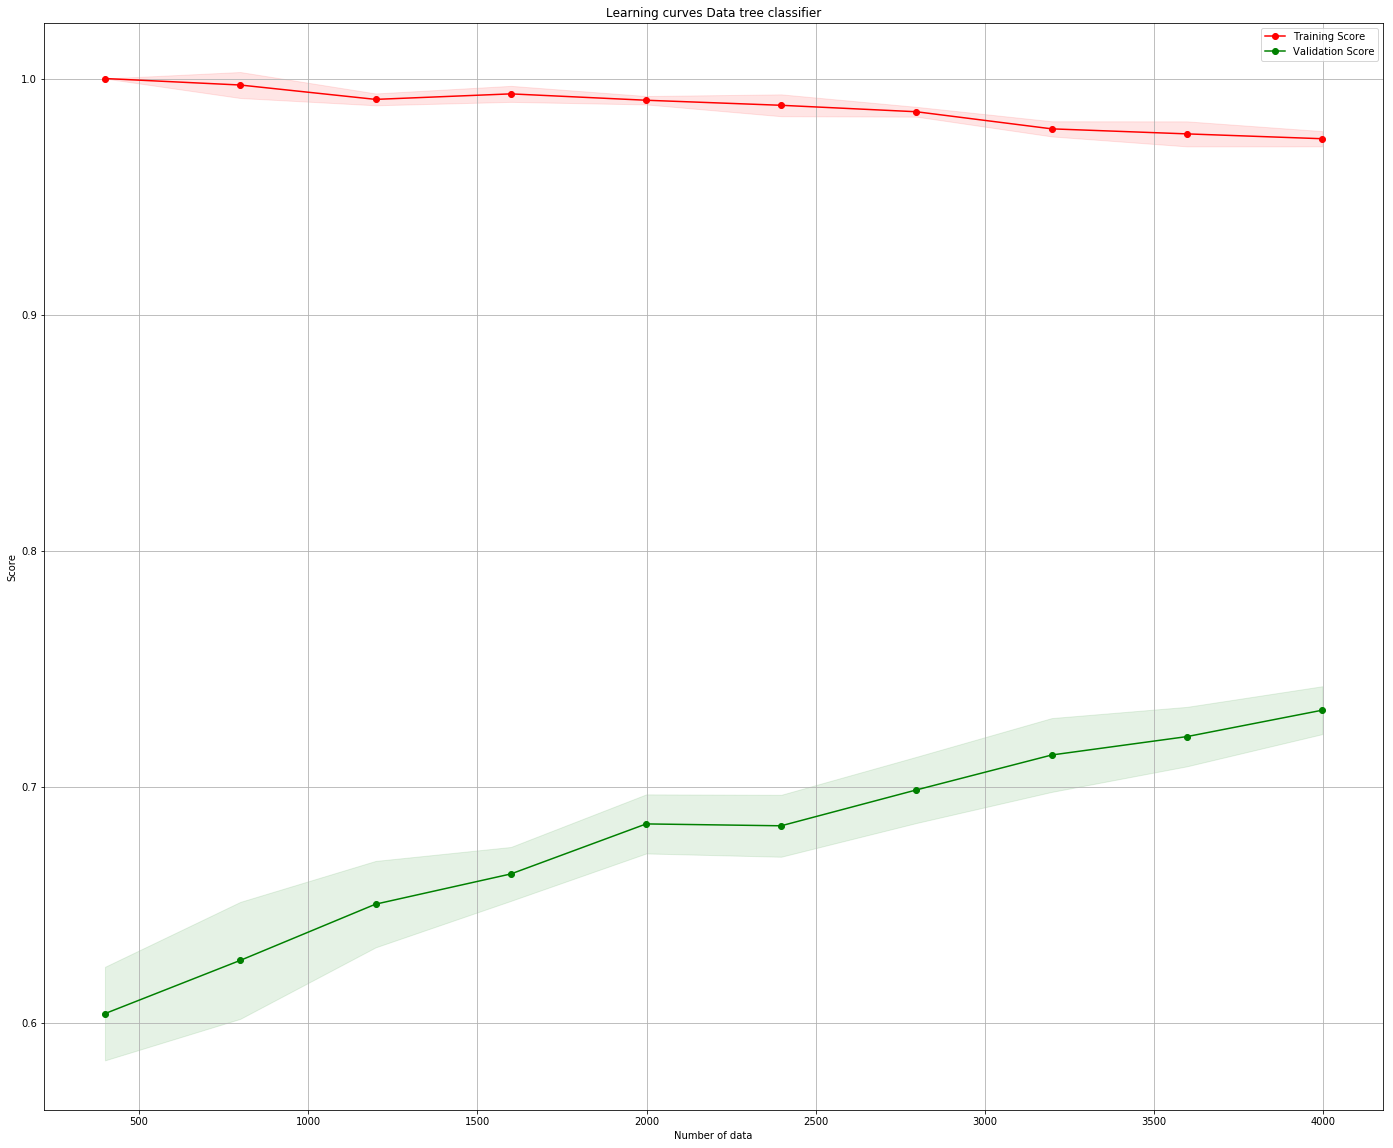

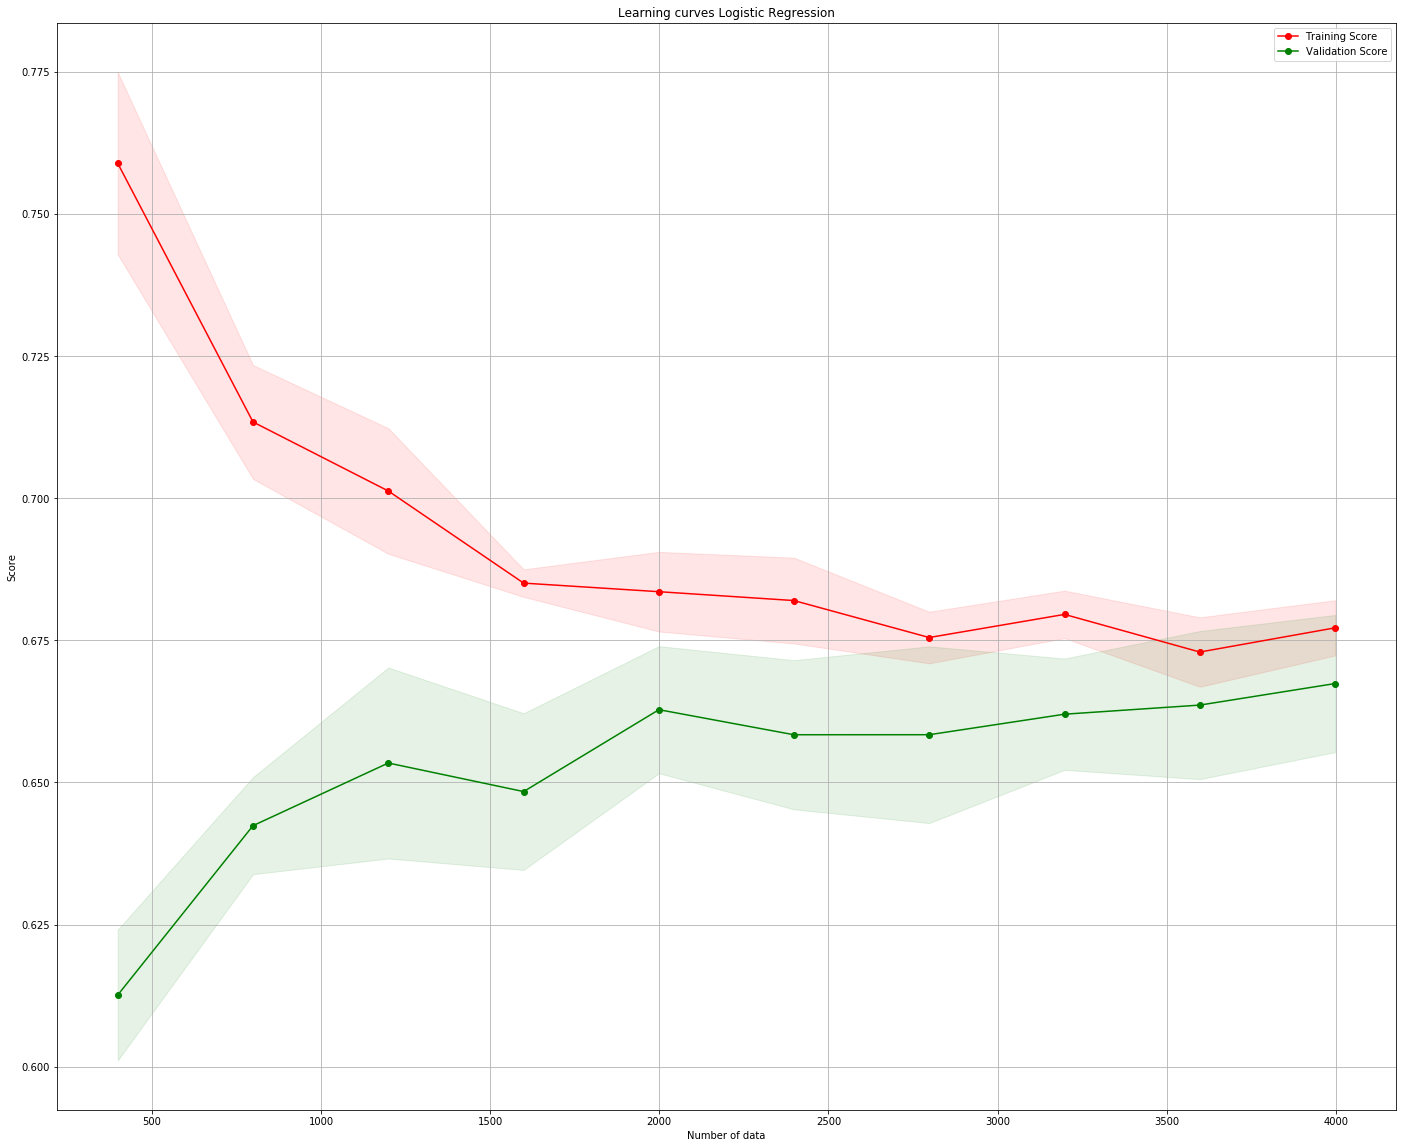

In [23]:
titleLc1 = "Learning curves Perceptron"
analyzer.plotLearningCurves(bestModel1.model, x, t, title=titleLc1)
plt.show()


titleLc3 = "Learning curves SVM with rbf"
analyzer.plotLearningCurves(bestModel3.model, x, t, title=titleLc3)
plt.show()    

   
titleLc4 = "Learning curves Data tree classifier"
analyzer.plotLearningCurves(bestModel4.model, x, t, title=titleLc4)
plt.show()

titleLc5 = "Learning curves Logistic Regression"
analyzer.plotLearningCurves(bestModel5.model, x, t, title=titleLc5)
plt.show()

Hidden layer to test : 
model 2a(200,) model2b (200,200,200) model 2c(200,400,600) model2d (600,)

Hyperparameters of the multilayer Perceptron(model 2a) :
alpha(reg) : 10^-3 to 10^5

validation curve model Multilayer Perceptron 
[0. 0. 0. 0.]
The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.39224909 0.45809154 0.37223402 0.37463901 0.3421761  0.39213402
 0.32110559]
The train scores std are :  [0.13599125 0.105948   0.10316193 0.1306082  0.08951636 0.08536942
 0.14196239]
The test scores means are :  [0.37720193 0.43345671 0.35886473 0.36604878 0.33268722 0.38468114
 0.31279182]
The test scores std are :  [0.13529847 0.09026615 0.09767936 0.12442194 0.09026352 0.07898531
 0.13447087]
1
Best alpha for the Multilayer Perceptron with  (200,)  is  0.01


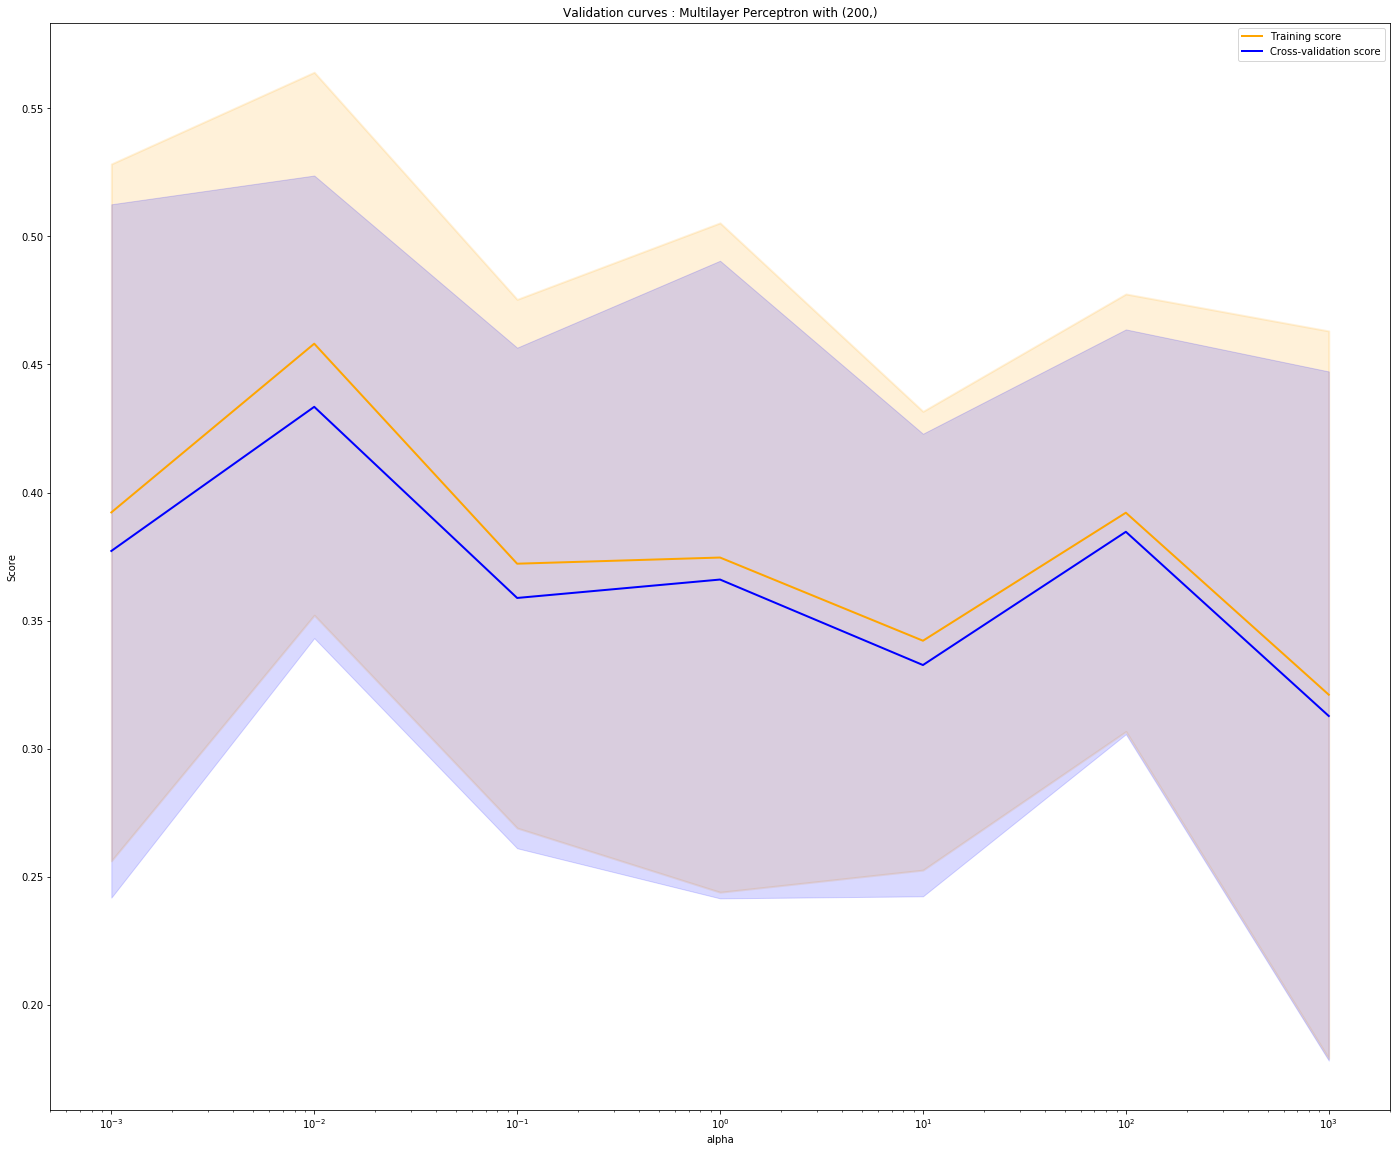

The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.30377712 0.34070282 0.35080712 0.36815602 0.38348886 0.37235529
 0.20727852]
The train scores std are :  [0.07161216 0.01160076 0.13827593 0.13952872 0.10438585 0.13505633
 0.07051358]
The test scores means are :  [0.30310105 0.32518353 0.33918642 0.35859625 0.37044995 0.36539235
 0.20908286]
The test scores std are :  [0.0691557  0.01409874 0.13025059 0.12775671 0.10125579 0.1282322
 0.072216  ]
4
Best alpha for the Multilayer Perceptron with  (200, 200, 200)  is  10.0


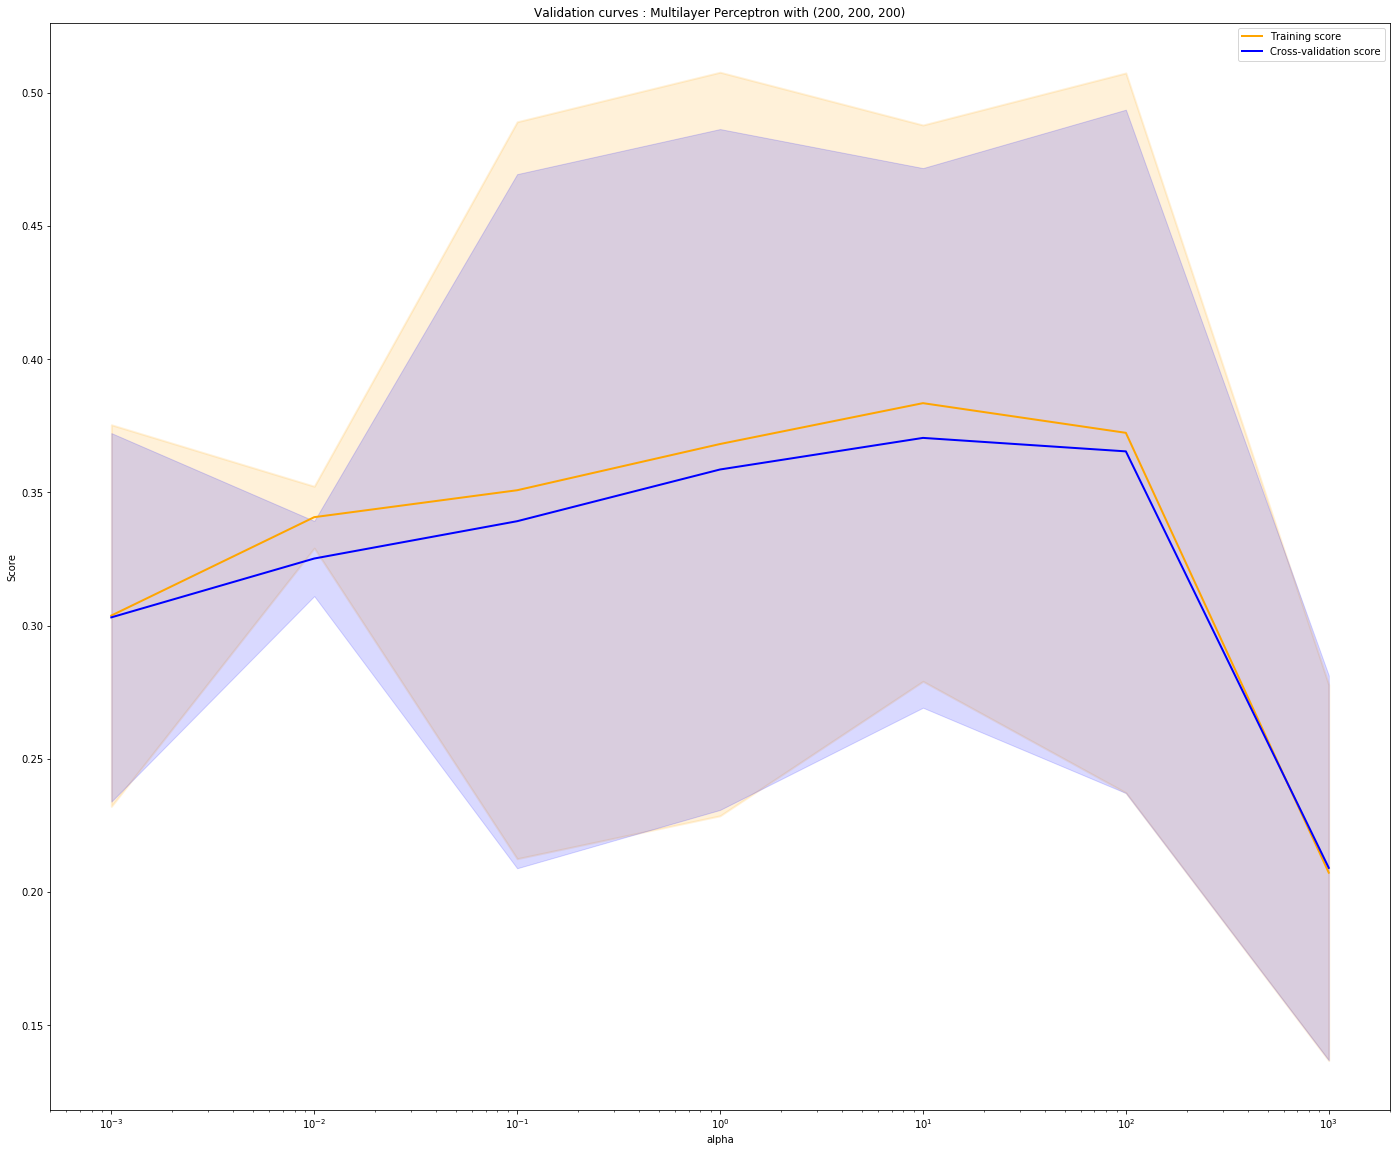

The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.4368513  0.35836102 0.37990205 0.37710977 0.58179972 0.3915039
 0.20012539]
The train scores std are :  [0.15195206 0.16302584 0.13243261 0.15022007 0.13213235 0.1328314
 0.06174774]
The test scores means are :  [0.40663449 0.34318791 0.36061572 0.35937394 0.54384504 0.38579101
 0.20189542]
The test scores std are :  [0.13051552 0.13892599 0.11957674 0.14222512 0.1016522  0.1283985
 0.06384933]
4
Best alpha for the Multilayer Perceptron with  (200, 400, 600)  is  10.0


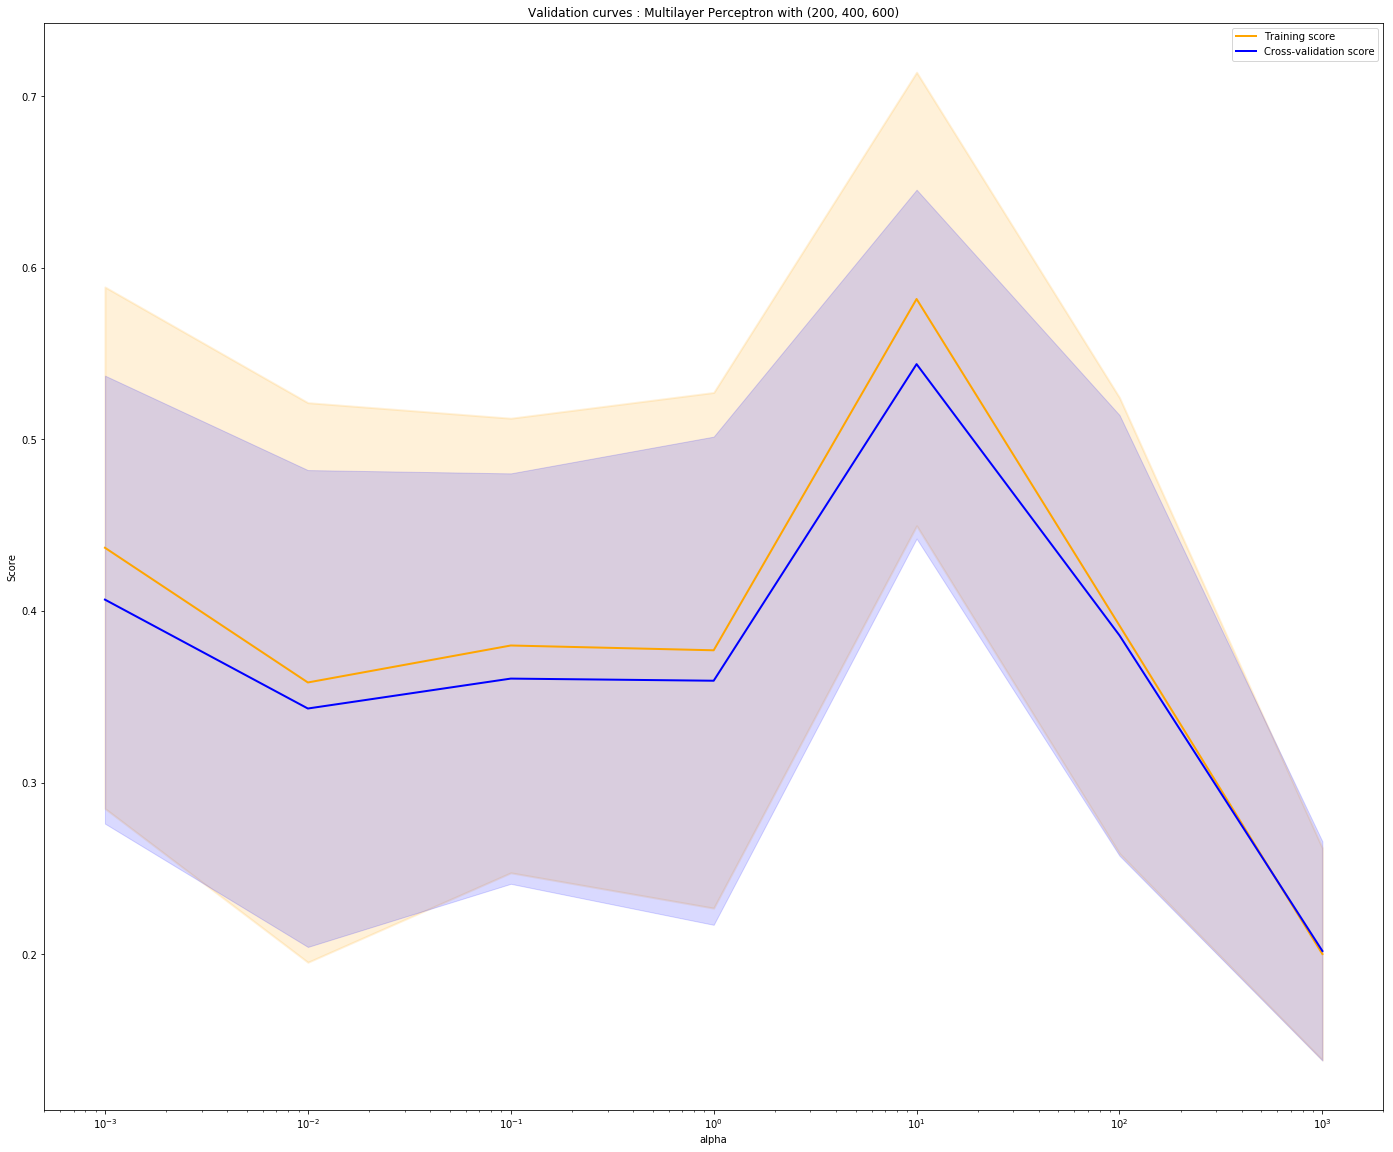

The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.31226054 0.27253754 0.37439499 0.30604139 0.32770589 0.30617102
 0.33792356]
The train scores std are :  [0.15245569 0.10224006 0.14410109 0.11114866 0.05898837 0.07732461
 0.08122443]
The test scores means are :  [0.30397639 0.2590652  0.34943654 0.30484315 0.32498897 0.29811569
 0.33272079]
The test scores std are :  [0.14157549 0.08923437 0.12941702 0.10801742 0.05956382 0.07786925
 0.06789315]
2
Best alpha for the Multilayer Perceptron with  (600,)  is  0.1


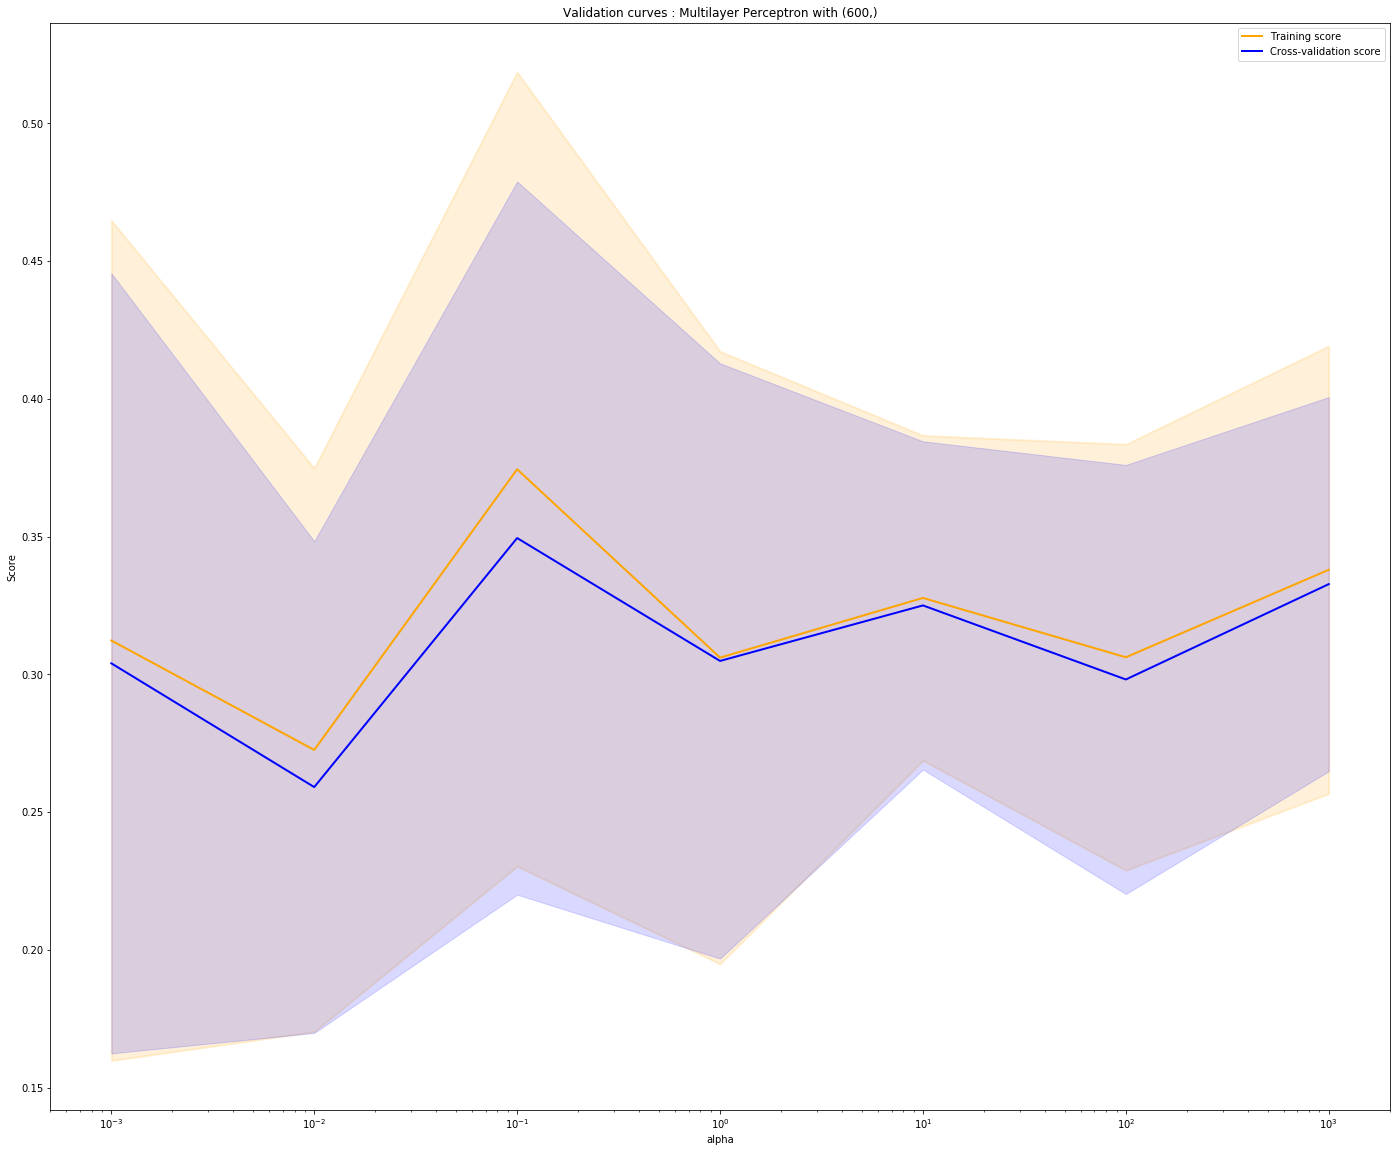

In [24]:
print("validation curve model Multilayer Perceptron ")

list_tuple = [(200,), (200,200,200), (200,400,600), (600,)]
z = 0
model2Alpha = np.zeros(4)
print(model2Alpha)
for specific_tuple in list_tuple:

    model2 = Model.MLPerceptron(hidden_layer_sizes=specific_tuple, activation='relu', reg=0.001)
    para_range = np.logspace(-3, 3, 7)
    titleVC = "Validation curves : Multilayer Perceptron with " + str(specific_tuple)
    plt, test_scores_mlp_alpha_means = analyzer.plotValidationCurve(model2.model, x, t, title=titleVC, param_name="alpha",param_range=para_range, verbose=True, scaling="log")
    
    bestInd = np.argmax(test_scores_mlp_alpha_means)
    print(bestInd)
    
    model2Alpha[z] = para_range[bestInd]
    print("Best alpha for the Multilayer Perceptron with ", specific_tuple, " is ", model2Alpha[z])
    
    plt.show()
    z = z + 1
    

Training of the model multilayer Perceptron (model 2a) :

In [25]:


list_tuple = [(200,), (200,200,200), (200,400,600), (600,)]
z = 0
bestModel2 = [Model.MLPerceptron(hidden_layer_sizes=1), Model.MLPerceptron(hidden_layer_sizes=1), Model.MLPerceptron(hidden_layer_sizes=1), Model.MLPerceptron(hidden_layer_sizes=1) ]

for specific_tuple in list_tuple:
    # Set hyperparameters of the multilayer Perceptron (model2a)
    hyp1Mod2 = model2Alpha[z]
    print("Training with the parameter (alpha) :", hyp1Mod2)

    # Training
    accu = np.zeros(k)

    for i in range(k):
        bestAccuMod2 = 0
        bestConfMaxMod2 = 0
        bestModel2 =  0
        print("Training ", i+1, " multi-layer Perceptron with ", str(specific_tuple) )
        md2 = Model.MLPerceptron(hidden_layer_sizes=specific_tuple, activation='relu', reg=hyp1Mod2, random_state=i) 
        md2.train(x_train, t_train)
        predictions_test = np.array([md2.prediction(x) for x in x_test])

        accu[i] = analyzer.accuracy(t_test, predictions_test)
    
        if accu[i] > bestAccuMod2:
            bestAccuMod2 = accu[i]
            if z == 0:
                bestModel2a = md2
            if z == 1:
                bestModel2b = md2
            if z == 2:
                bestModel2c = md2
            if z == 3:
                bestModel2d = md2
            bestConfMaxMod2 = analyzer.confusionMatrix(t_test, predictions_test)

    # Average accuracy and  std accuracy
    print(accu)
    accuMean = np.mean(accu)
    accuStd = np.std(accu)
    print("The average accuracy is : ", accuMean)
    print("The std accuracu is : ", accuStd)
    print("The best accuracy is : ", bestAccuMod2)
    print("The confusion matrix of the best model : ")
    print(bestConfMaxMod2)
    z = z+1


Training with the parameter (alpha) : 0.01
Training  1  multi-layer Perceptron with  (200,)
Training  2  multi-layer Perceptron with  (200,)
Training  3  multi-layer Perceptron with  (200,)
Training  4  multi-layer Perceptron with  (200,)
Training  5  multi-layer Perceptron with  (200,)
Training  6  multi-layer Perceptron with  (200,)
Training  7  multi-layer Perceptron with  (200,)
Training  8  multi-layer Perceptron with  (200,)
Training  9  multi-layer Perceptron with  (200,)
Training  10  multi-layer Perceptron with  (200,)
[0.414 0.45  0.472 0.466 0.436 0.572 0.458 0.55  0.502 0.458]
The average accuracy is :  0.47780000000000006
The std accuracu is :  0.04713767071037771
The best accuracy is :  0.458
The confusion matrix of the best model : 
[[65  5  0  0  0  5  2]
 [47  4  0  1  0  7  2]
 [ 5  5 13 22  0 32  0]
 [ 0  0  0 75  0  6  0]
 [27  9  0  7 14  4  0]
 [ 7  4  4  9  1 46  0]
 [55  4  0  0  1  0 12]]
Training with the parameter (alpha) : 10.0
Training  1  multi-layer Perce

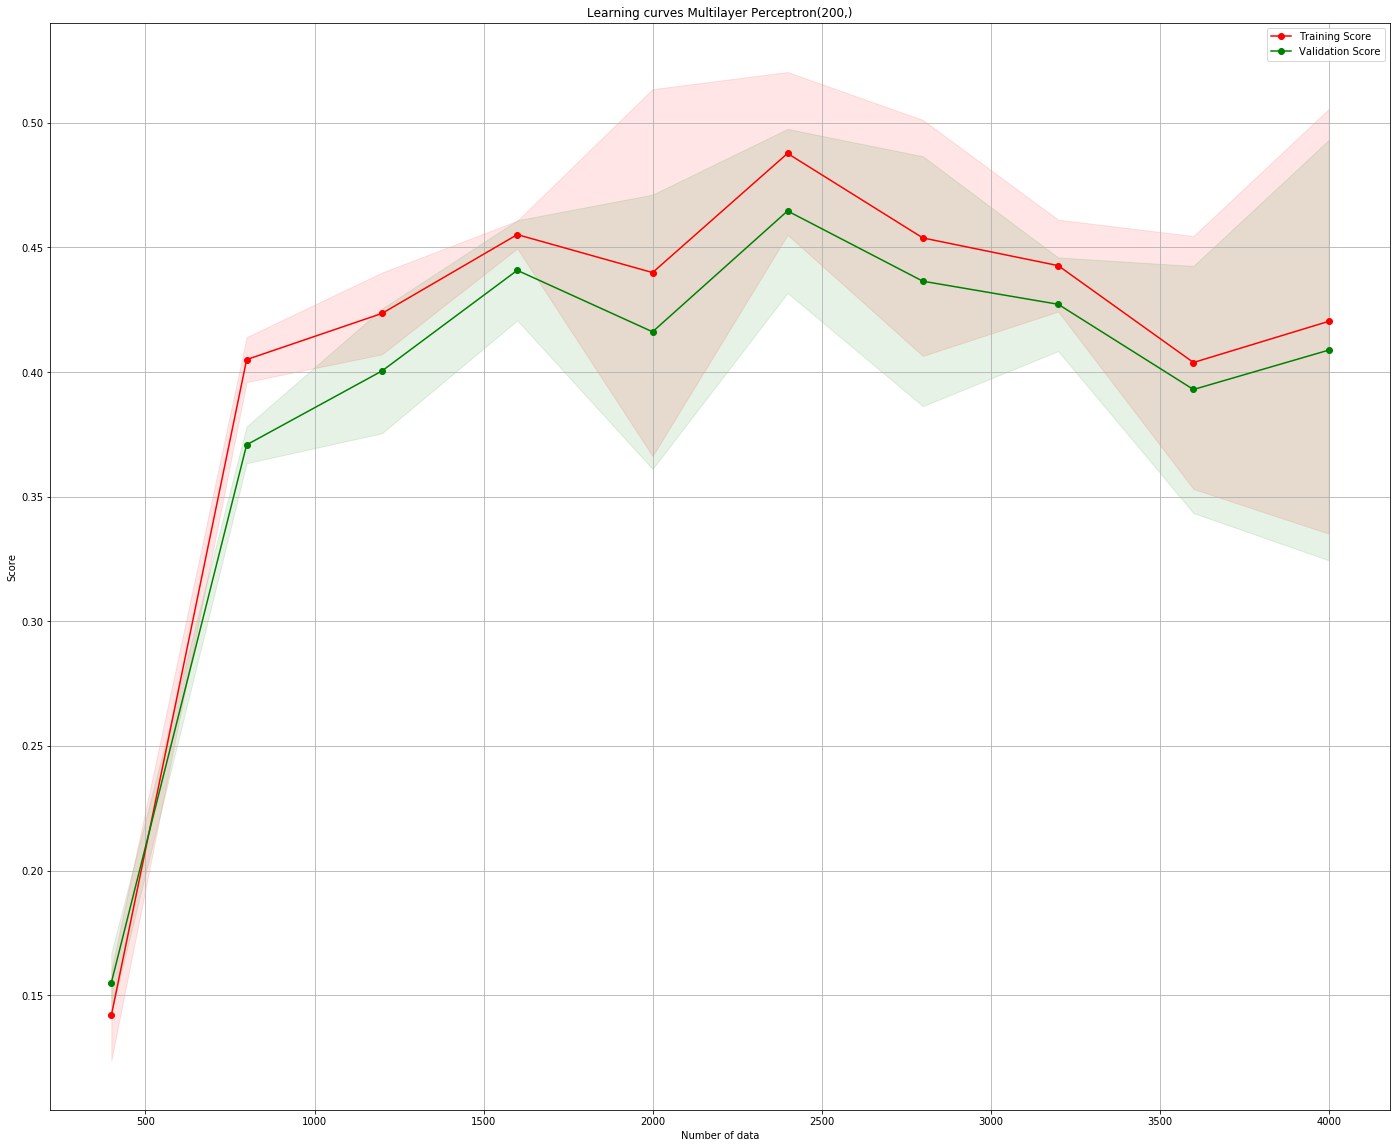

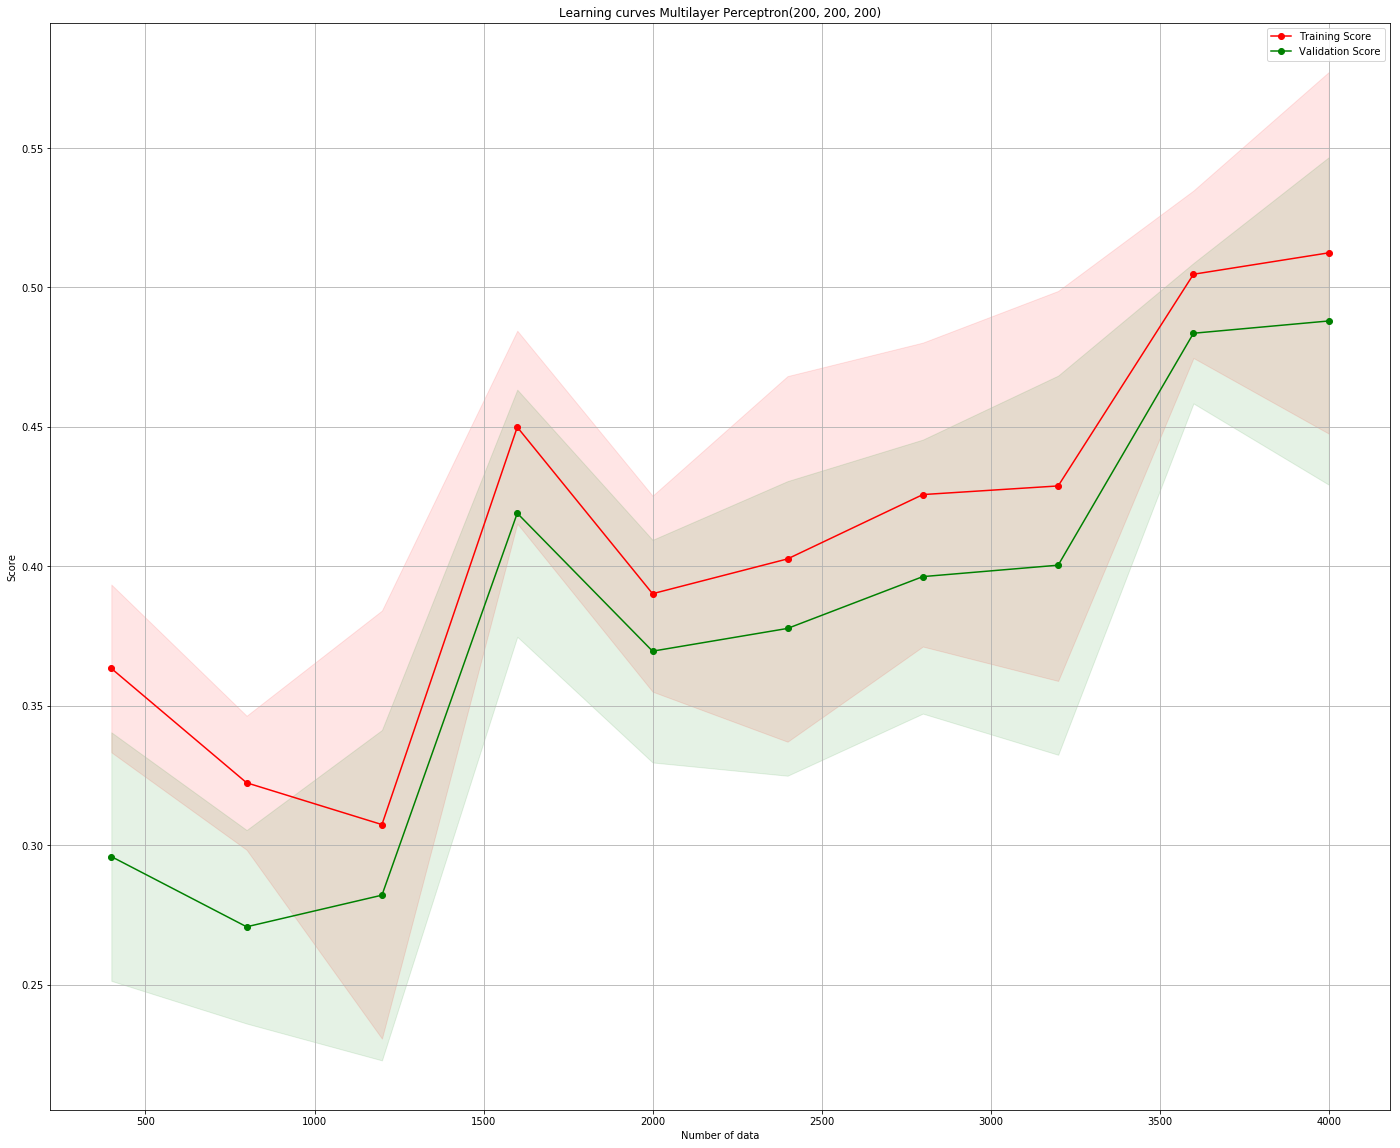

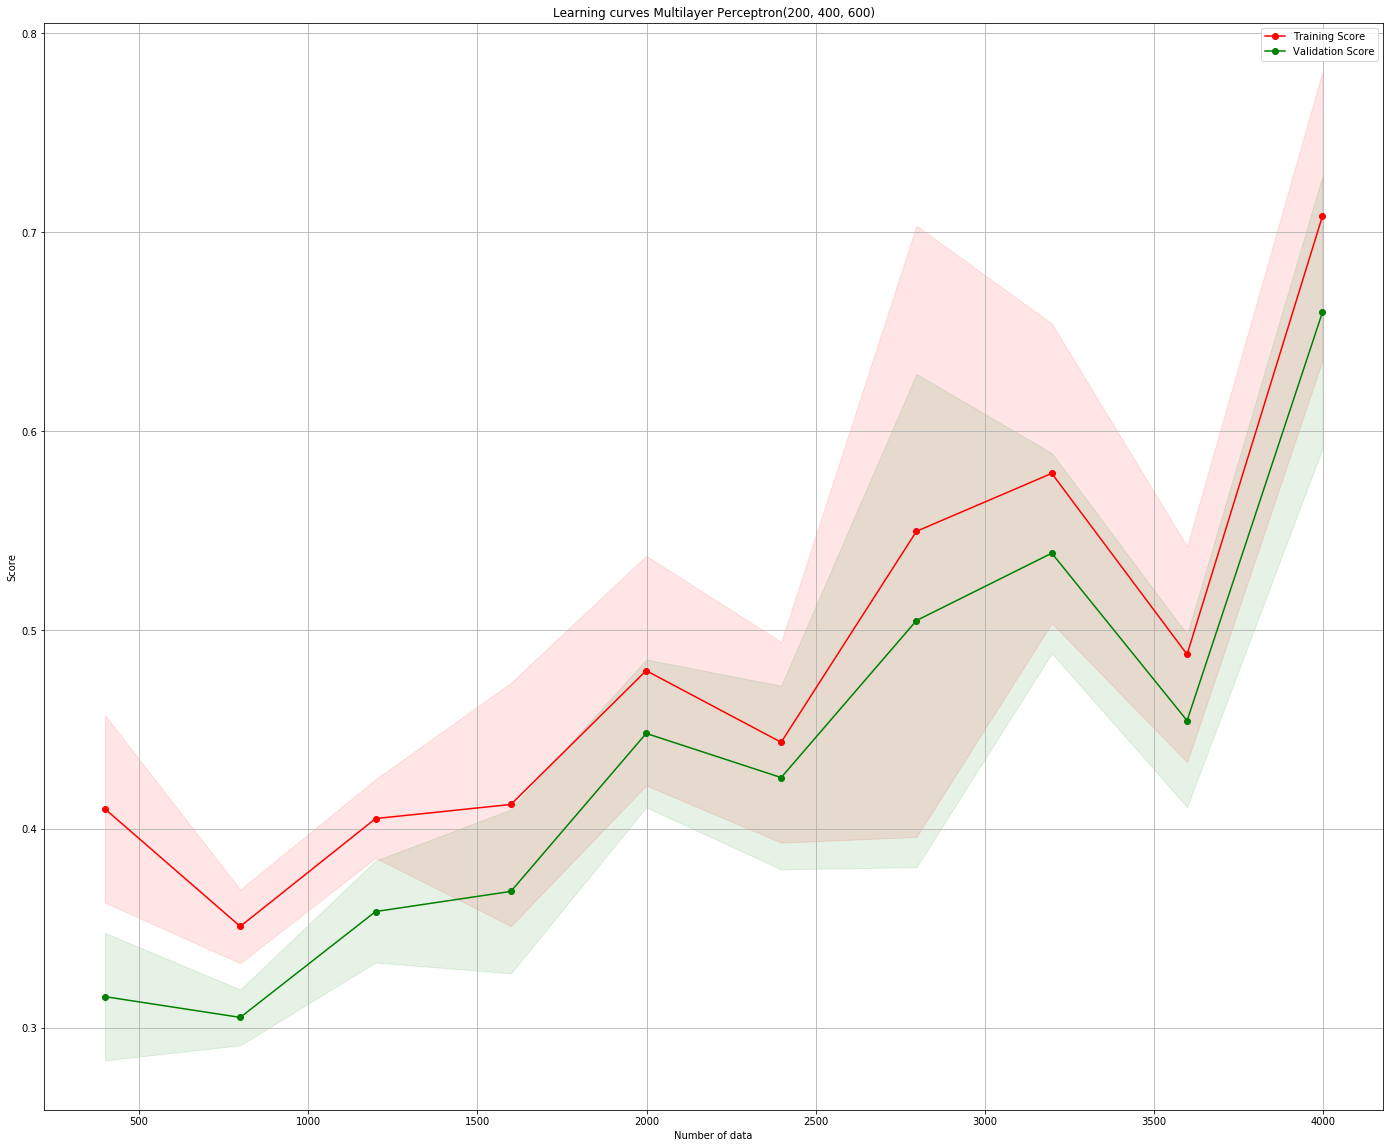

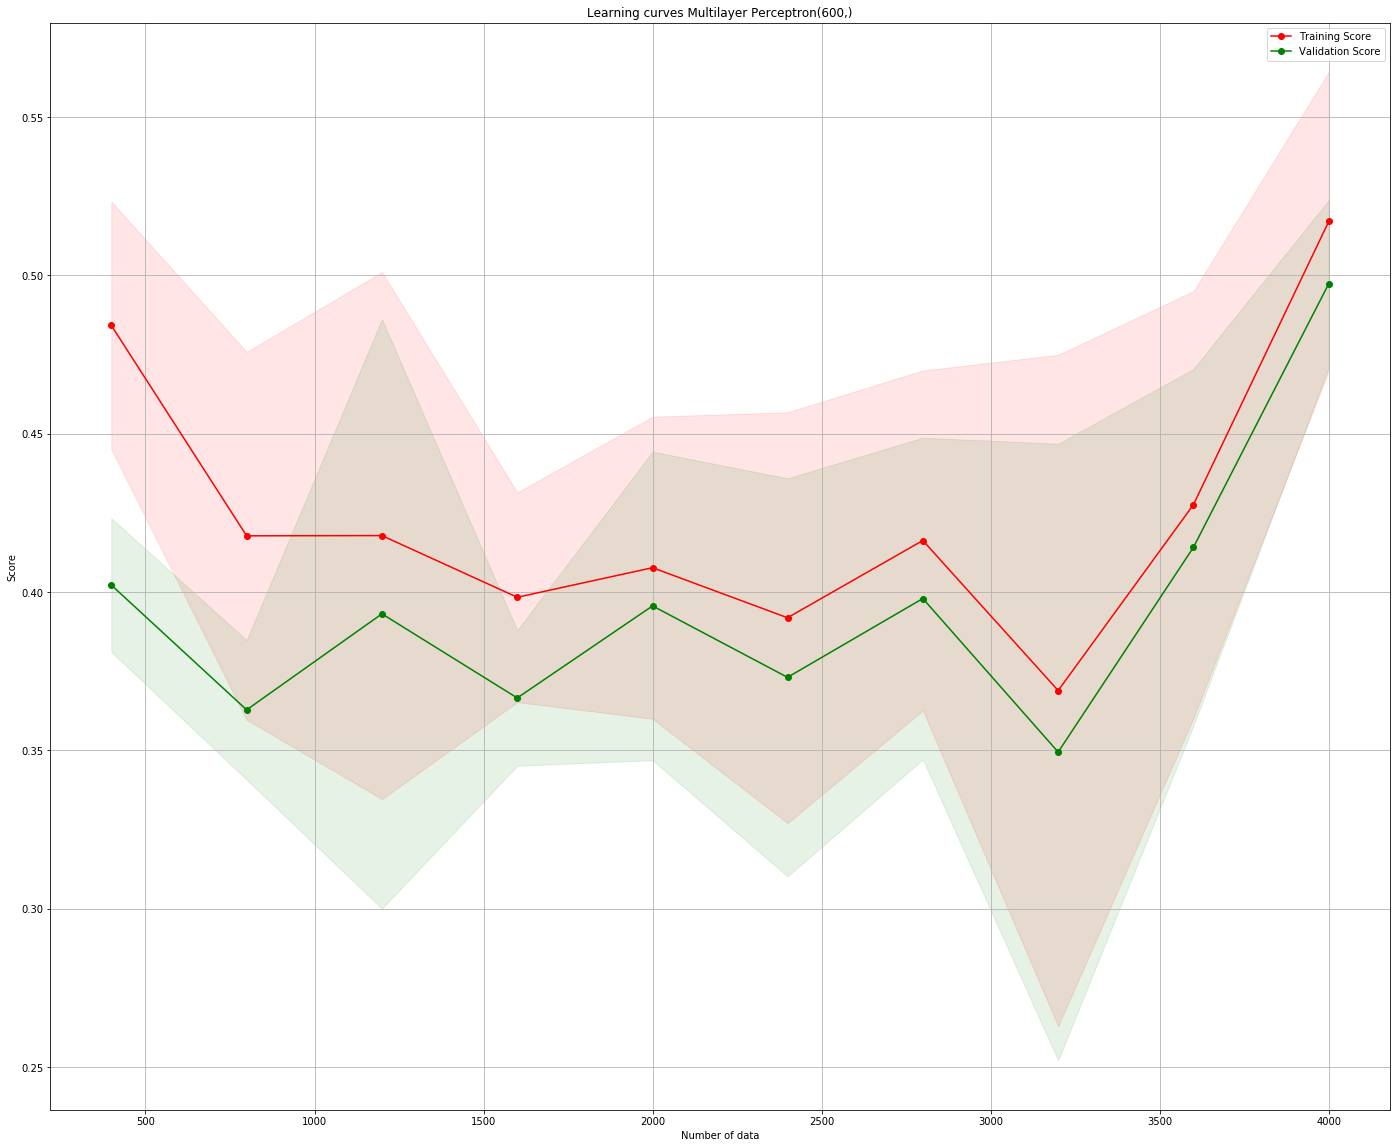

In [26]:
z=0
for specific_tuple in list_tuple:
    
    if z == 0:
        bestModel2 = bestModel2a
    if z == 1:
        bestModel2 = bestModel2b
    if z == 2:
        bestModel2 = bestModel2c
    if z == 3:
        bestModel2 = bestModel2d
    
    titleLc2 = "Learning curves Multilayer Perceptron" + str(specific_tuple)
    analyzer.plotLearningCurves(bestModel2.model, x, t, title=titleLc2)
    plt.show()
    z= z+1

Bagging Multi-layer perceptron (200,):

In [27]:
# setting up base model model 2a(200,) model2b (200,200,200) model 2c(200,400,600) model2d (600,)
base_model = 'MLPerceptron' 
number_model = [10, 25]  #  changer 10 25 
bestAccuMod6 = 0
bestConfMaxMod6 = 0
bestModel6 =  0
hypModBag = model2Alpha[0]

# Training 
accu = np.zeros(k)
print("Hidden layer size = (200, 0)")
for nb in number_model:
    bestAccuMod6 = 0
    bestConfMaxMod6 = 0
    bestModel6 =  0
    print("(base model, numbermodel) = ", base_model, nb)
    for j in range(k):
        print("Training ", j+1, " Bagging model" )
        md6 = Model.Bagging(base_model=base_model, number_model=nb, reg_penalty='l2',hidden_layer_sizes=(200,), reg=hyp1Mod1,random_state=i)
        md6.train(x_train, t_train)
        predictions_test = np.array([md6.prediction(x) for x in x_test])

        accu[j] = analyzer.accuracy(t_test, predictions_test)
        if accu[j] > bestAccuMod6:
            bestAccuMod6 = accu[j]
            bestModel6 = md6
            bestConfMaxMod6 = analyzer.confusionMatrix(t_test, predictions_test)
    
    # Average accuracy and  std accuracy
    print(accu)
    accuMean = np.mean(accu)
    accuStd = np.std(accu)
    print("The average accuracy is : ", accuMean)
    print("The std accuracu is : ", accuStd)
    print("The best accuracy is : ", bestAccuMod6)
    print("The confusion matrix of the best model : ")
    print(bestConfMaxMod6)

Hidden layer size = (200, 0)
(base model, numbermodel) =  MLPerceptron 10
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Training  9  Bagging model
Training  10  Bagging model
[0.618 0.618 0.618 0.618 0.618 0.618 0.618 0.618 0.618 0.618]
The average accuracy is :  0.6180000000000001
The std accuracu is :  1.1102230246251565e-16
The best accuracy is :  0.618
The confusion matrix of the best model : 
[[35 12  0  0  4  3 23]
 [15 26  3  0  6  4  7]
 [ 0  5 44 10  3 15  0]
 [ 0  0  7 72  0  2  0]
 [ 3 15  2  0 35  4  2]
 [ 2  3 21 12  1 32  0]
 [ 5  1  0  0  1  0 65]]
(base model, numbermodel) =  MLPerceptron 25
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model

In [28]:
# setting up base model
base_model = 'MLPerceptron' 
number_model = [10, 25]  #  changer 10 25 
bestAccuMod6 = 0
bestConfMaxMod6 = 0
bestModel6 =  0
hypModBag = model2Alpha[1]

# Training 
accu = np.zeros(k)
print("Hidden layer size = (200, 200, 200)")
for nb in number_model:
    bestAccuMod6 = 0
    bestConfMaxMod6 = 0
    bestModel6 =  0
    print("(base model, numbermodel) = ", base_model, nb)
    for j in range(k):
        print("Training ", j+1, " Bagging model" )
        md6 = Model.Bagging(base_model=base_model, number_model=nb, reg_penalty='l2',hidden_layer_sizes=(200,200, 200), reg=hyp1Mod1,random_state=i)
        md6.train(x_train, t_train)
        predictions_test = np.array([md6.prediction(x) for x in x_test])

        accu[j] = analyzer.accuracy(t_test, predictions_test)
        if accu[j] > bestAccuMod6:
            bestAccuMod6 = accu[j]
            bestModel6 = md6
            bestConfMaxMod6 = analyzer.confusionMatrix(t_test, predictions_test)
    
    # Average accuracy and  std accuracy
    print(accu)
    accuMean = np.mean(accu)
    accuStd = np.std(accu)
    print("The average accuracy is : ", accuMean)
    print("The std accuracu is : ", accuStd)
    print("The best accuracy is : ", bestAccuMod6)
    print("The confusion matrix of the best model : ")
    print(bestConfMaxMod6)

Hidden layer size = (200, 200, 200)
(base model, numbermodel) =  MLPerceptron 10
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Training  9  Bagging model
Training  10  Bagging model
[0.578 0.578 0.578 0.578 0.578 0.578 0.578 0.578 0.578 0.578]
The average accuracy is :  0.5780000000000001
The std accuracu is :  1.1102230246251565e-16
The best accuracy is :  0.578
The confusion matrix of the best model : 
[[32 21  0  0  6  2 16]
 [16 27  1  0  8  5  4]
 [ 0 10 25 12 10 20  0]
 [ 0  0  1 71  0  9  0]
 [ 0 14  0  0 38  7  2]
 [ 0  6 11 12  4 38  0]
 [ 4 10  0  0  0  0 58]]
(base model, numbermodel) =  MLPerceptron 25
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Baggin

In [29]:
# setting up base model
base_model = 'MLPerceptron' 
number_model = [10, 25]  #  changer 10 25 
bestAccuMod6 = 0
bestConfMaxMod6 = 0
bestModel6 =  0
hypModBag = model2Alpha[2]

# Training 
accu = np.zeros(k)
print("Hidden layer size = (200, 400, 600)")
for nb in number_model:
    bestAccuMod6 = 0
    bestConfMaxMod6 = 0
    bestModel6 =  0
    print("(base model, numbermodel) = ", base_model, nb)
    for j in range(k):
        print("Training ", j+1, " Bagging model" )
        md6 = Model.Bagging(base_model=base_model, number_model=nb, reg_penalty='l2',hidden_layer_sizes=(200, 400, 600), reg=hyp1Mod1,random_state=i)
        md6.train(x_train, t_train)
        predictions_test = np.array([md6.prediction(x) for x in x_test])

        accu[j] = analyzer.accuracy(t_test, predictions_test)
        if accu[j] > bestAccuMod6:
            bestAccuMod6 = accu[j]
            bestModel6 = md6
            bestConfMaxMod6 = analyzer.confusionMatrix(t_test, predictions_test)
    
    # Average accuracy and  std accuracy
    print(accu)
    accuMean = np.mean(accu)
    accuStd = np.std(accu)
    print("The average accuracy is : ", accuMean)
    print("The std accuracu is : ", accuStd)
    print("The best accuracy is : ", bestAccuMod6)
    print("The confusion matrix of the best model : ")
    print(bestConfMaxMod6)

Hidden layer size = (200, 400, 600)
(base model, numbermodel) =  MLPerceptron 10
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Training  9  Bagging model
Training  10  Bagging model
[0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666]
The average accuracy is :  0.6660000000000001
The std accuracu is :  1.1102230246251565e-16
The best accuracy is :  0.666
The confusion matrix of the best model : 
[[51  5  1  0  4  2 14]
 [30 14  3  0  7  3  4]
 [ 2  0 42  7  8 18  0]
 [ 0  0  2 76  1  2  0]
 [ 7  2  1  0 48  3  0]
 [ 1  1 15  6  5 43  0]
 [12  0  0  0  1  0 59]]
(base model, numbermodel) =  MLPerceptron 25
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Baggin

In [30]:
# setting up base model
base_model = 'MLPerceptron' 
number_model = [10, 25]  #  changer 10 25 
bestAccuMod6 = 0
bestConfMaxMod6 = 0
bestModel6 =  0
hypModBag = model2Alpha[3]

# Training 
accu = np.zeros(k)
print("Hidden layer size = (600, )")
for nb in number_model:
    bestAccuMod6 = 0
    bestConfMaxMod6 = 0
    bestModel6 =  0
    print("(base model, numbermodel) = ", base_model, nb)
    for j in range(k):
        print("Training ", j+1, " Bagging model" )
        md6 = Model.Bagging(base_model=base_model, number_model=nb, reg_penalty='l2',hidden_layer_sizes=(600,), reg=hyp1Mod1,random_state=i)
        md6.train(x_train, t_train)
        predictions_test = np.array([md6.prediction(x) for x in x_test])

        accu[j] = analyzer.accuracy(t_test, predictions_test)
        if accu[j] > bestAccuMod6:
            bestAccuMod6 = accu[j]
            bestModel6 = md6
            bestConfMaxMod6 = analyzer.confusionMatrix(t_test, predictions_test)
    
    # Average accuracy and  std accuracy
    print(accu)
    accuMean = np.mean(accu)
    accuStd = np.std(accu)
    print("The average accuracy is : ", accuMean)
    print("The std accuracu is : ", accuStd)
    print("The best accuracy is : ", bestAccuMod6)
    print("The confusion matrix of the best model : ")
    print(bestConfMaxMod6)

Hidden layer size = (600, )
(base model, numbermodel) =  MLPerceptron 10
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Training  9  Bagging model
Training  10  Bagging model
[0.646 0.646 0.646 0.646 0.646 0.646 0.646 0.646 0.646 0.646]
The average accuracy is :  0.646
The std accuracu is :  0.0
The best accuracy is :  0.646
The confusion matrix of the best model : 
[[40 16  1  0  4  0 16]
 [13 30  0  0  5  6  7]
 [ 0  6 46  9  6 10  0]
 [ 0  0  6 68  1  6  0]
 [ 2 13  0  1 40  2  3]
 [ 0  2 22  7  3 37  0]
 [ 3  6  0  0  1  0 62]]
(base model, numbermodel) =  MLPerceptron 25
Training  1  Bagging model
Training  2  Bagging model
Training  3  Bagging model
Training  4  Bagging model
Training  5  Bagging model
Training  6  Bagging model
Training  7  Bagging model
Training  8  Bagging model
Training  9  Bagging model
Train

Learning curves of each model with the best model : 

Hyperparameters SVM with poly kernel :
deg : 1 to 3
C : 10^-3 to 10^3

range(1, 4)
The param is :  C
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.65490026 0.66229989 0.67299967 0.70295004 0.71455024 0.70965096
 0.7100009 ]
The train scores std are :  [0.0040463  0.00373842 0.0032454  0.0041821  0.00388126 0.00399383
 0.00515531]
The test scores means are :  [0.64800702 0.65540223 0.66160085 0.68639092 0.69819836 0.69519375
 0.69620595]
The test scores std are :  [0.01811401 0.01528272 0.01639289 0.01150843 0.01168224 0.01624647
 0.01625228]
4
Best c for the degree  1  is :  10.0


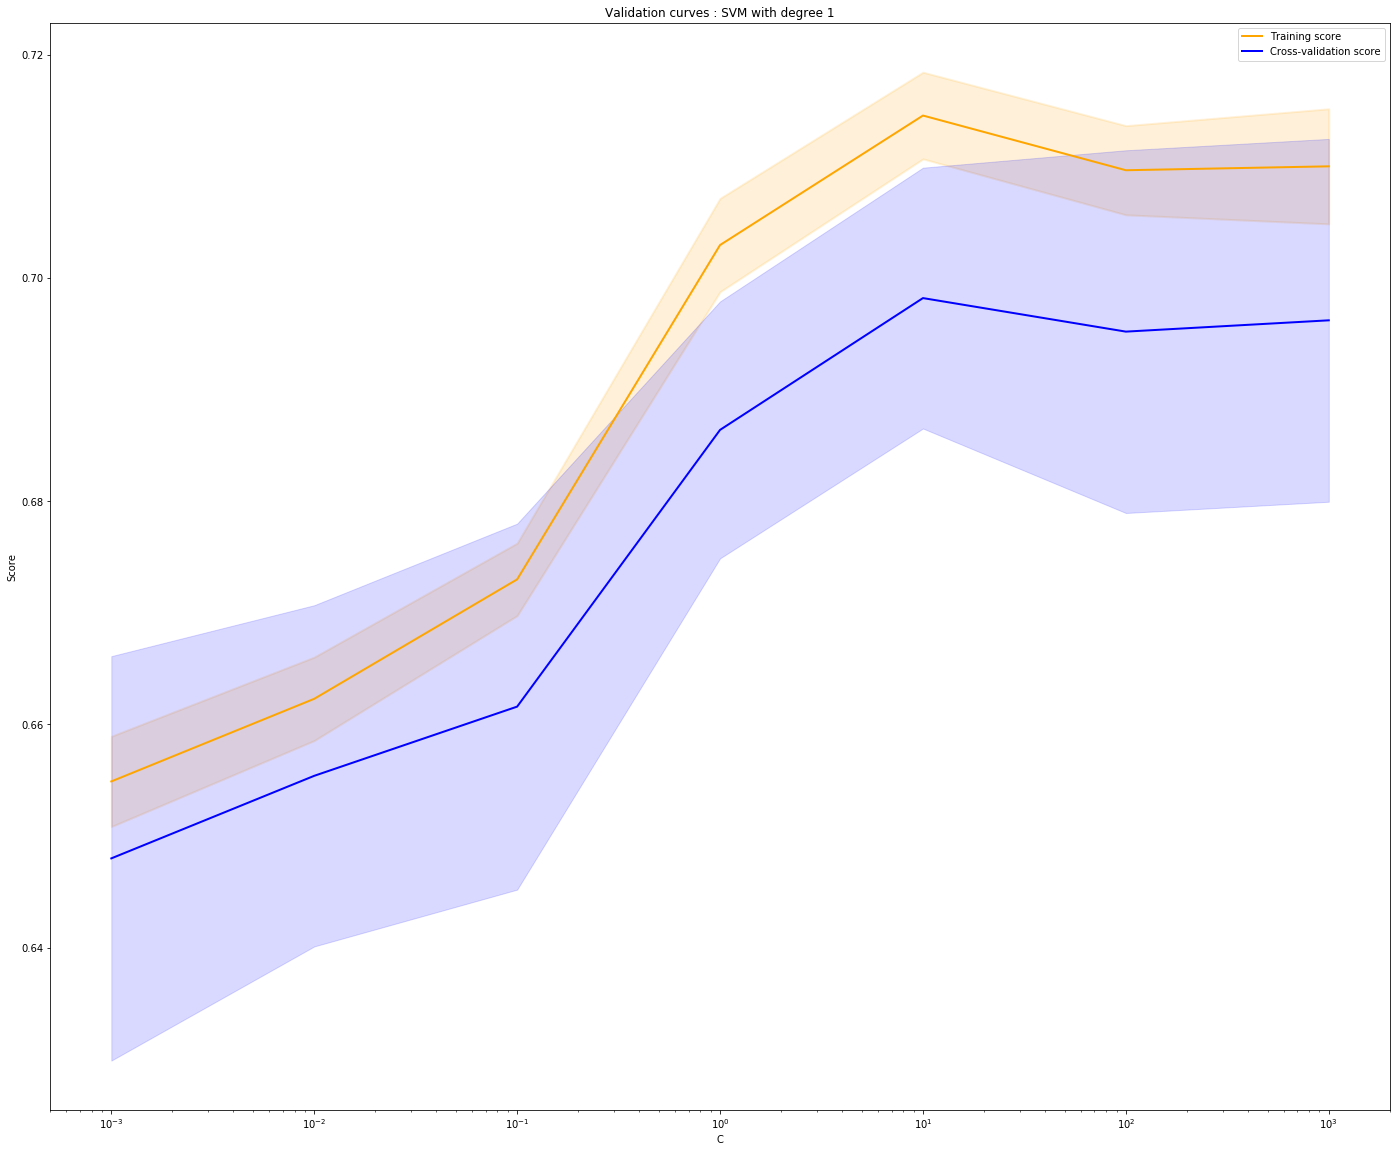

NameError: name 'mode7Reg' is not defined

In [32]:
minDeg = 1
maxDeg = 4
print(range(minDeg, maxDeg))
bestDegMod7 = 1
bestCMod7 = 1
bestTestScore = float("inf")

for deg in range(minDeg, maxDeg):
    model7 = Model.ModelSVM(gamma="auto",  kernel="poly", degree=1)
    para_range = np.logspace(-3, 3, 7)
    titleVC = "Validation curves : SVM with degree " + str(deg)
    plt, test_scores_deg_means = analyzer.plotValidationCurve(model7.model, x, t, title=titleVC, param_name="C",param_range=para_range, verbose=True, scaling="log")
    
    bestInd = np.argmax(test_scores_deg_means)
    print(bestInd)
    
    model7Reg = para_range[bestInd]
    print("Best c for the degree ", deg, " is : ",model7Reg)
    
    plt.show()
    
    if test_scores_deg_means[bestInd] < bestTestScore:
        bestTestScore
        bestCMod7 = model7Reg
        bestDegMod7 = deg

print("The best parameter are (deg, C) :", bestDegMod7, bestCMod7)

Training model SVM with poly kernel : 

In [ ]:
# Set hyperparameters of the SVM model
hyp1Mod7 = bestDegMod7
hyp2Mod7 = bestCMod7
print("Training with the parameters (deg, C) :", hyp1Mod7, hyp2Mod7)

bestAccuMod7 = 0
bestConfMaxMod7 = 0
bestModel7 =  0

# Training
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " model SVM...")
    md7 = Model.ModelSVM(gamma="auto",  kernel="poly", degree=hyp1Mod7, reg=hyp2Mod7, random_state=i)
    md7.train(x_train, t_train)
    predictions_test = np.array([md7.prediction(x) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)
    
    if accu[i] > bestAccuMod7:
        bestAccuMod7 = accu[i]
        bestModel7 = md7
        bestConfMaxMod7 = analyzer.confusionMatrix(t_test, predictions_test)


# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod7)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod7)

Learning curves SVM(poly):

In [ ]:
titleLc7 = "Learning curves SVM with poly"
analyzer.plotLearningCurves(bestModel7.model, x, t, titleLc7)
plt.show()

In [33]:
print("Loading Database 2...")
dm = DM.DataManager(15000, 100, normalisation=False)
x_train2, t_train2, x_test2, t_test2 = dm.generer_donnees()
print("Done")

Loading Database 2...
Done


In [34]:
x = x_train2
t = t_train2

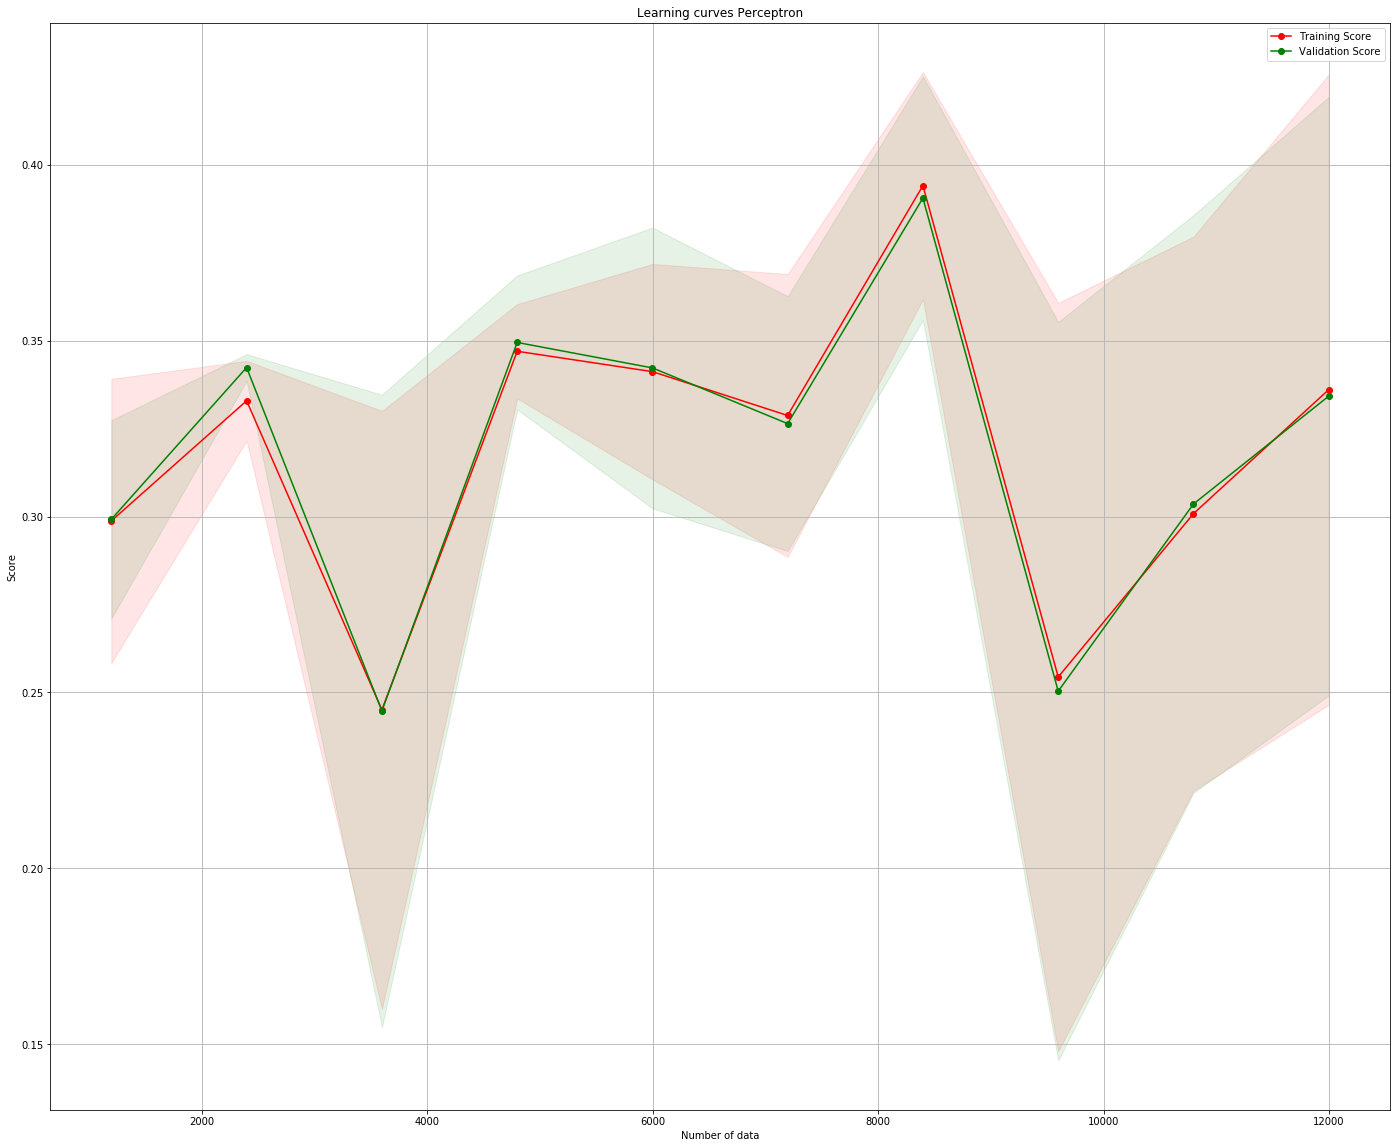

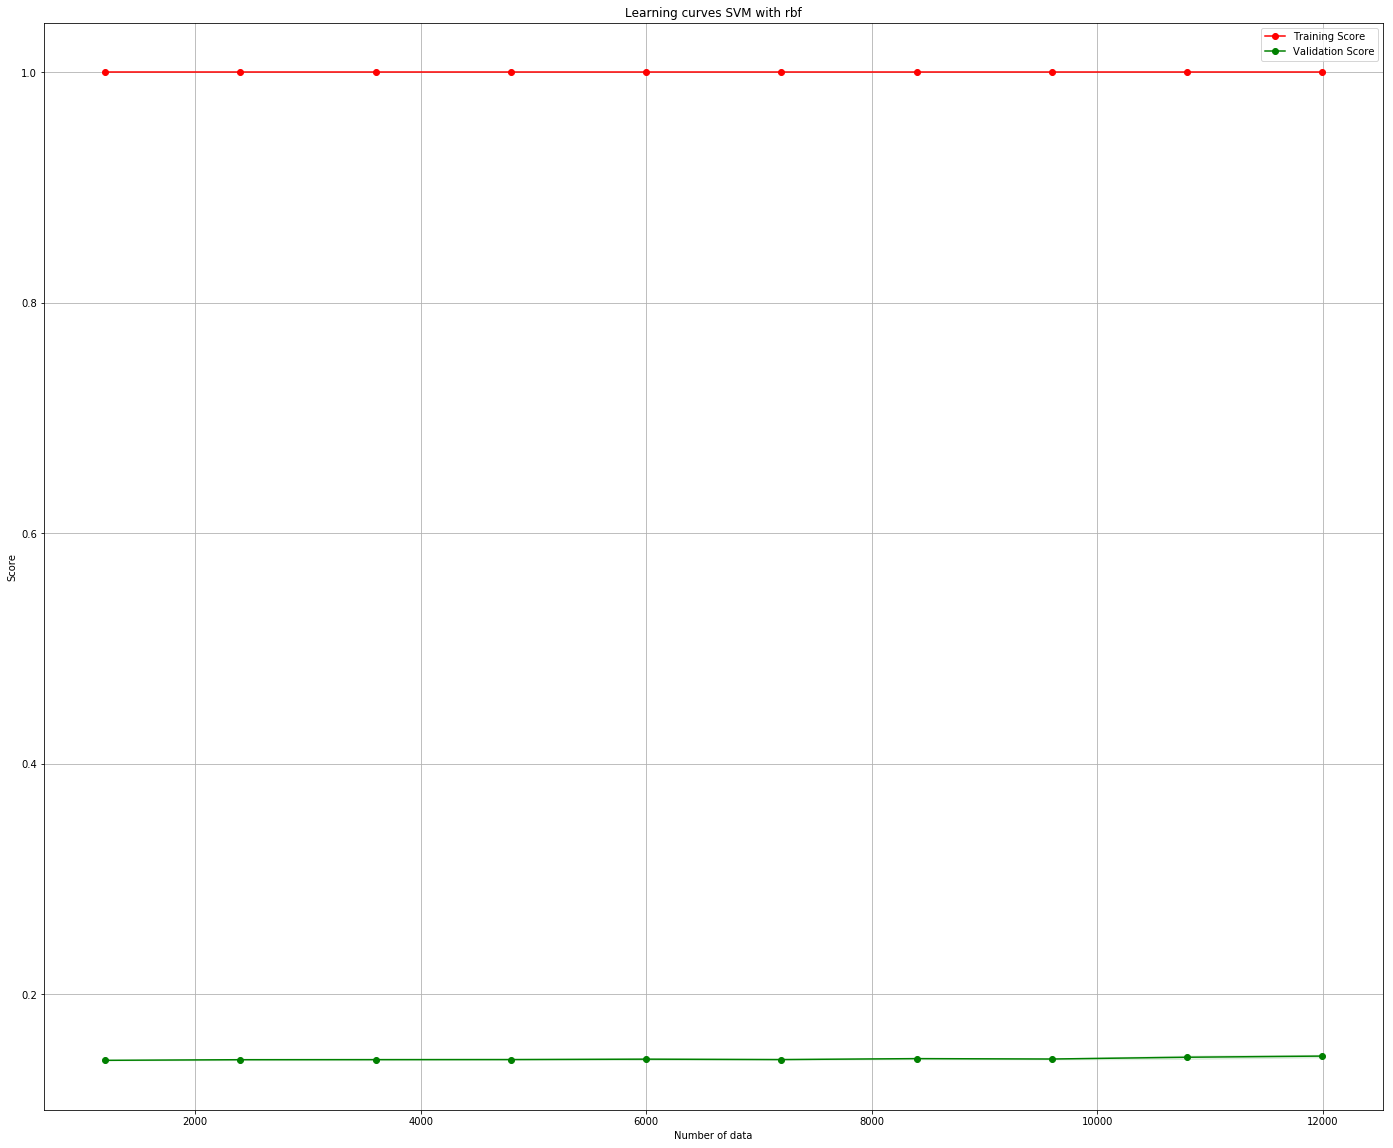

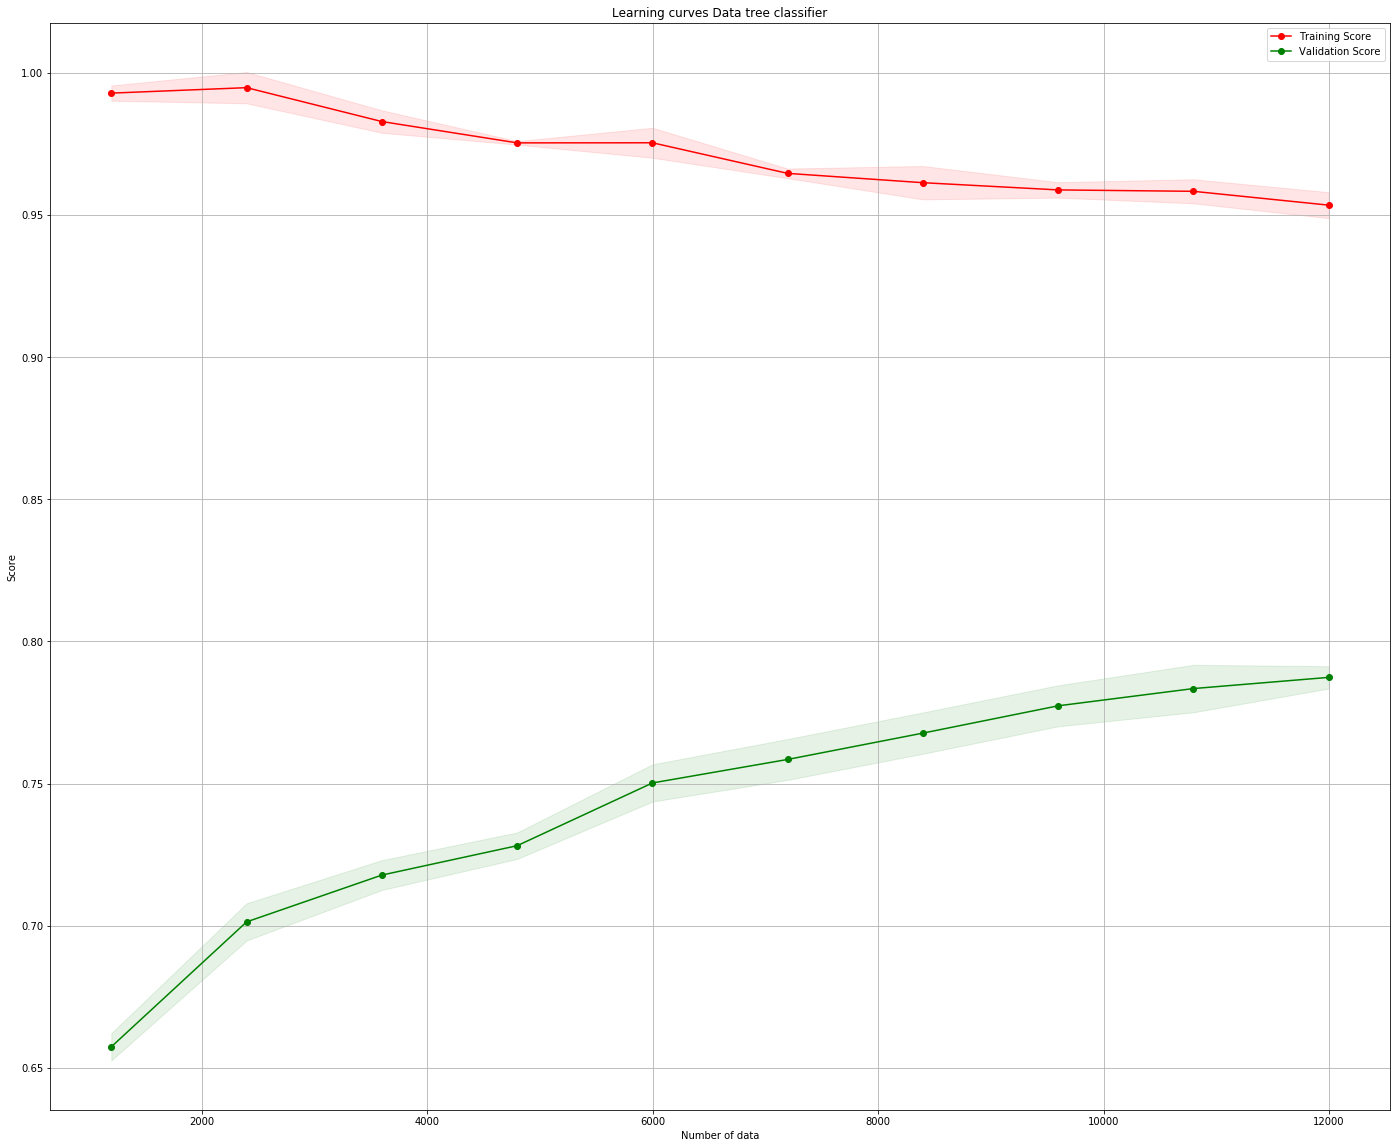

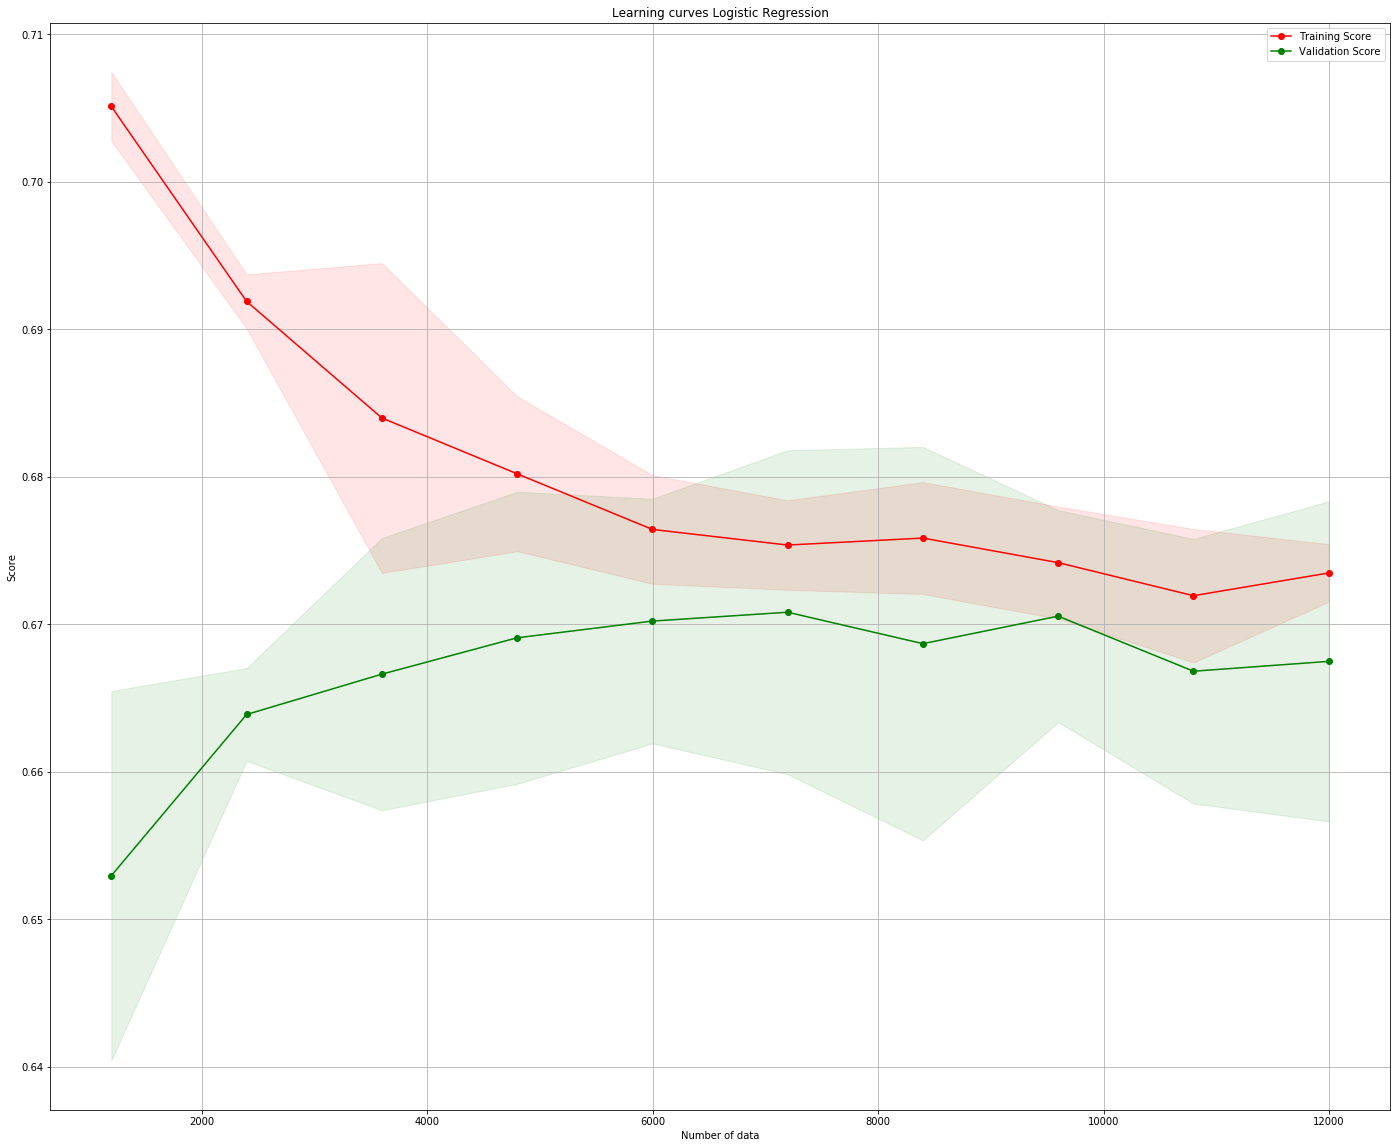

In [35]:
titleLc1 = "Learning curves Perceptron"
analyzer.plotLearningCurves(bestModel1.model, x, t, title=titleLc1)
plt.show()


titleLc3 = "Learning curves SVM with rbf"
analyzer.plotLearningCurves(bestModel3.model, x, t, title=titleLc3)
plt.show()    

   
titleLc4 = "Learning curves Data tree classifier"
analyzer.plotLearningCurves(bestModel4.model, x, t, title=titleLc4)
plt.show()

titleLc5 = "Learning curves Logistic Regression"
analyzer.plotLearningCurves(bestModel5.model, x, t, title=titleLc5)
plt.show()

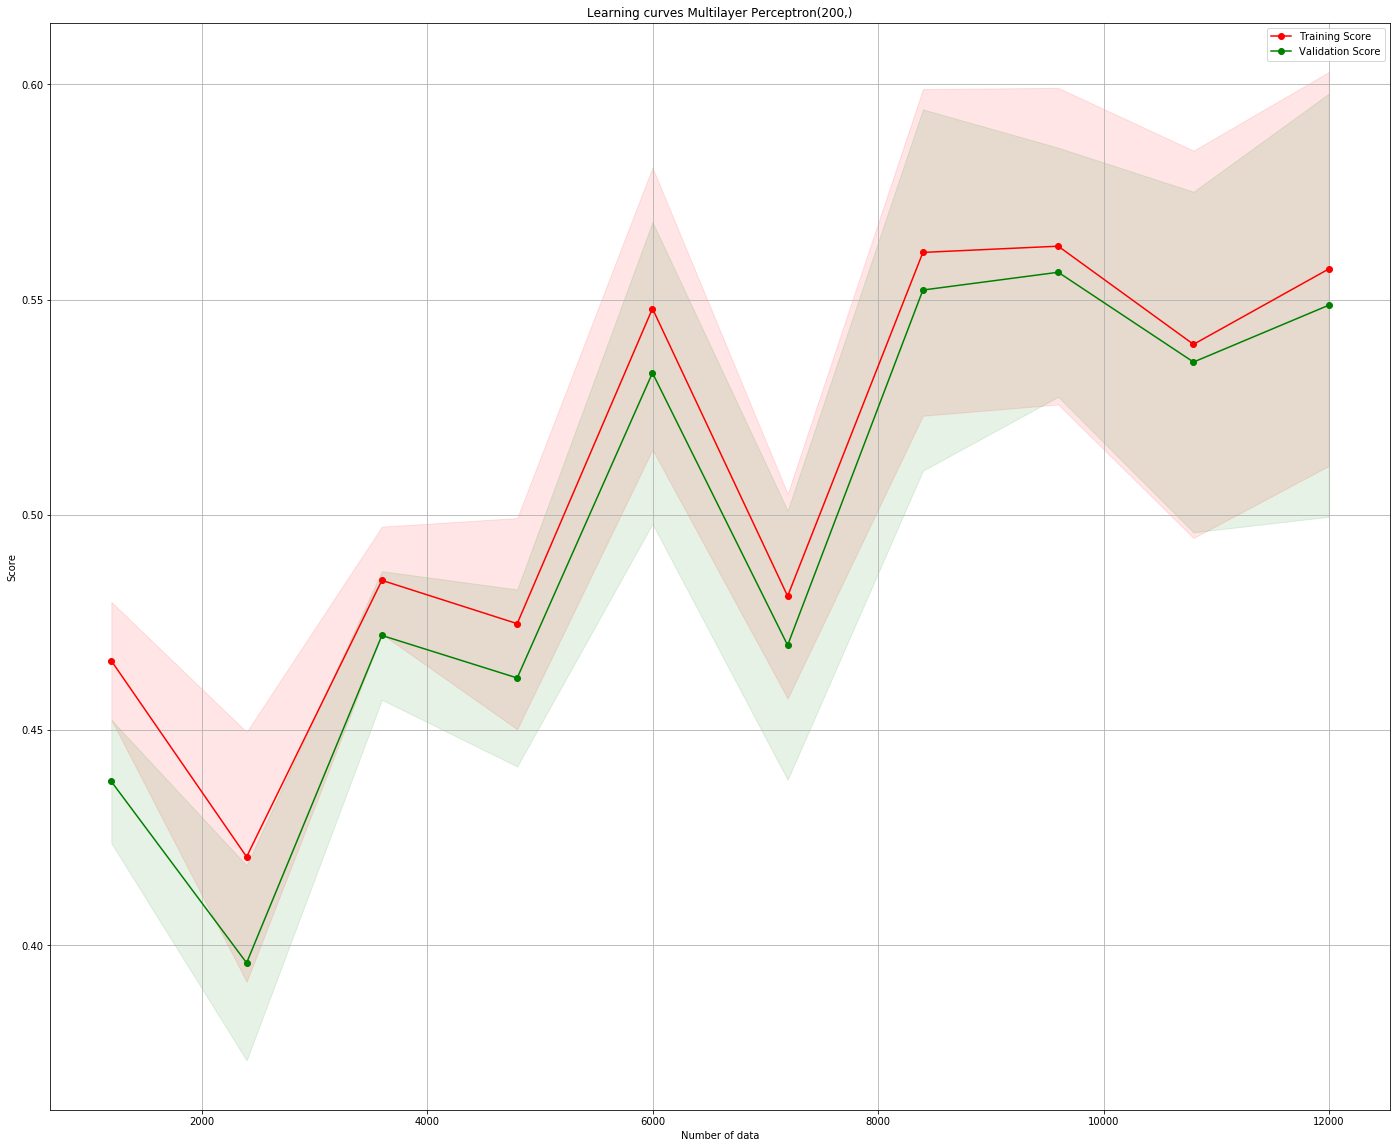

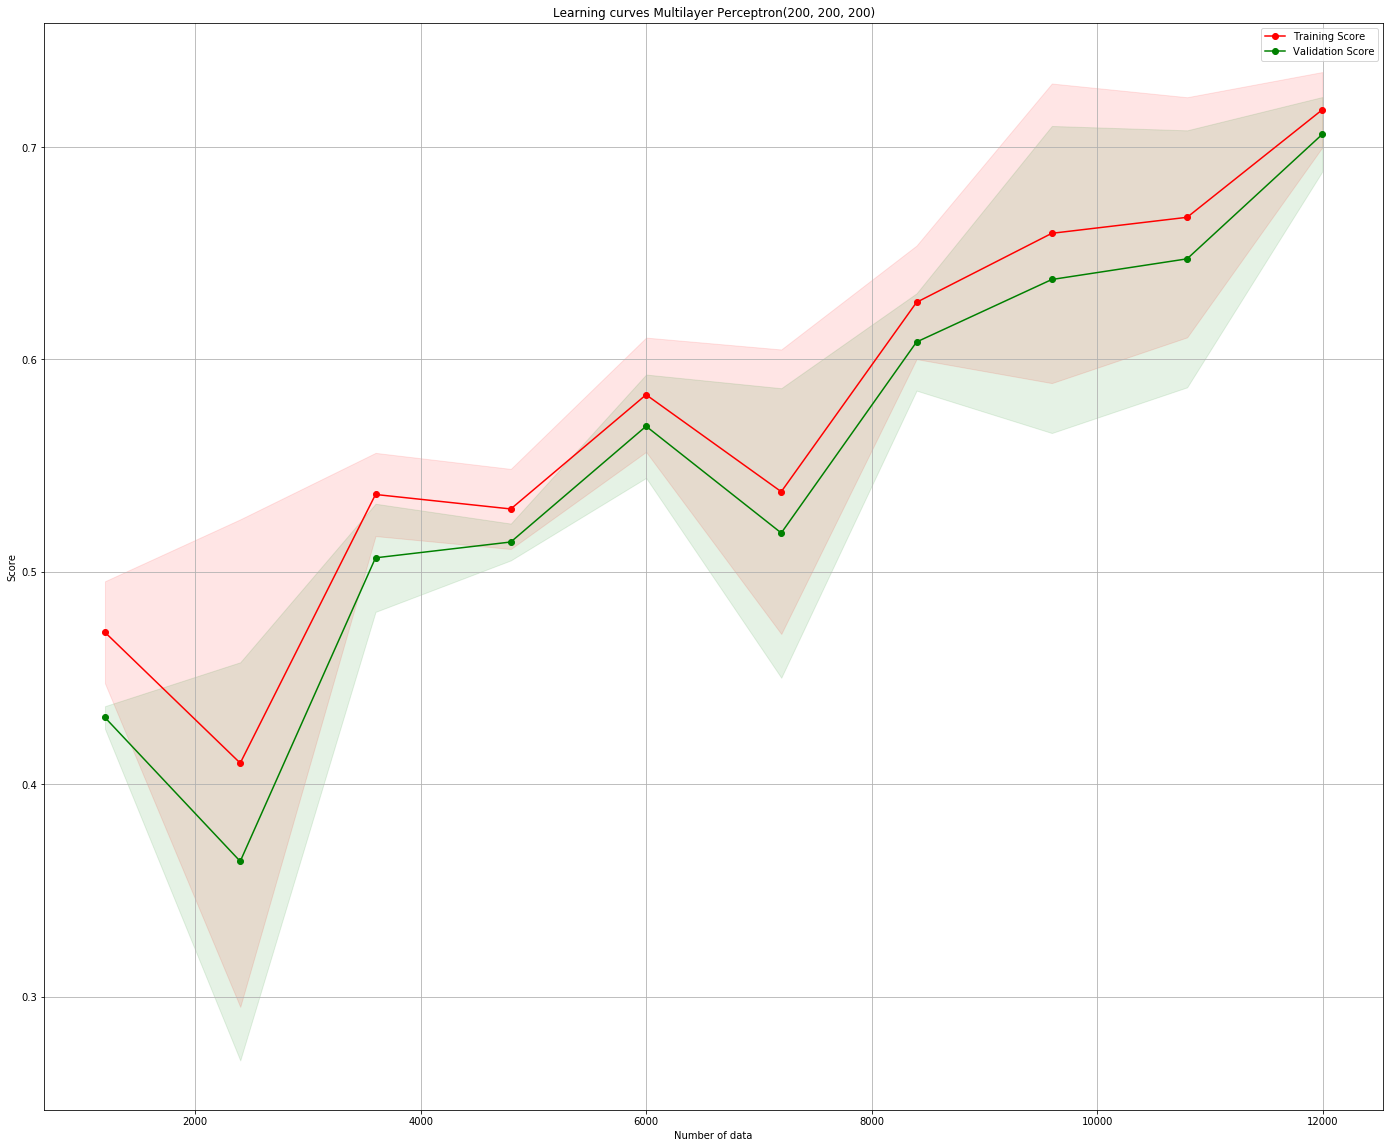

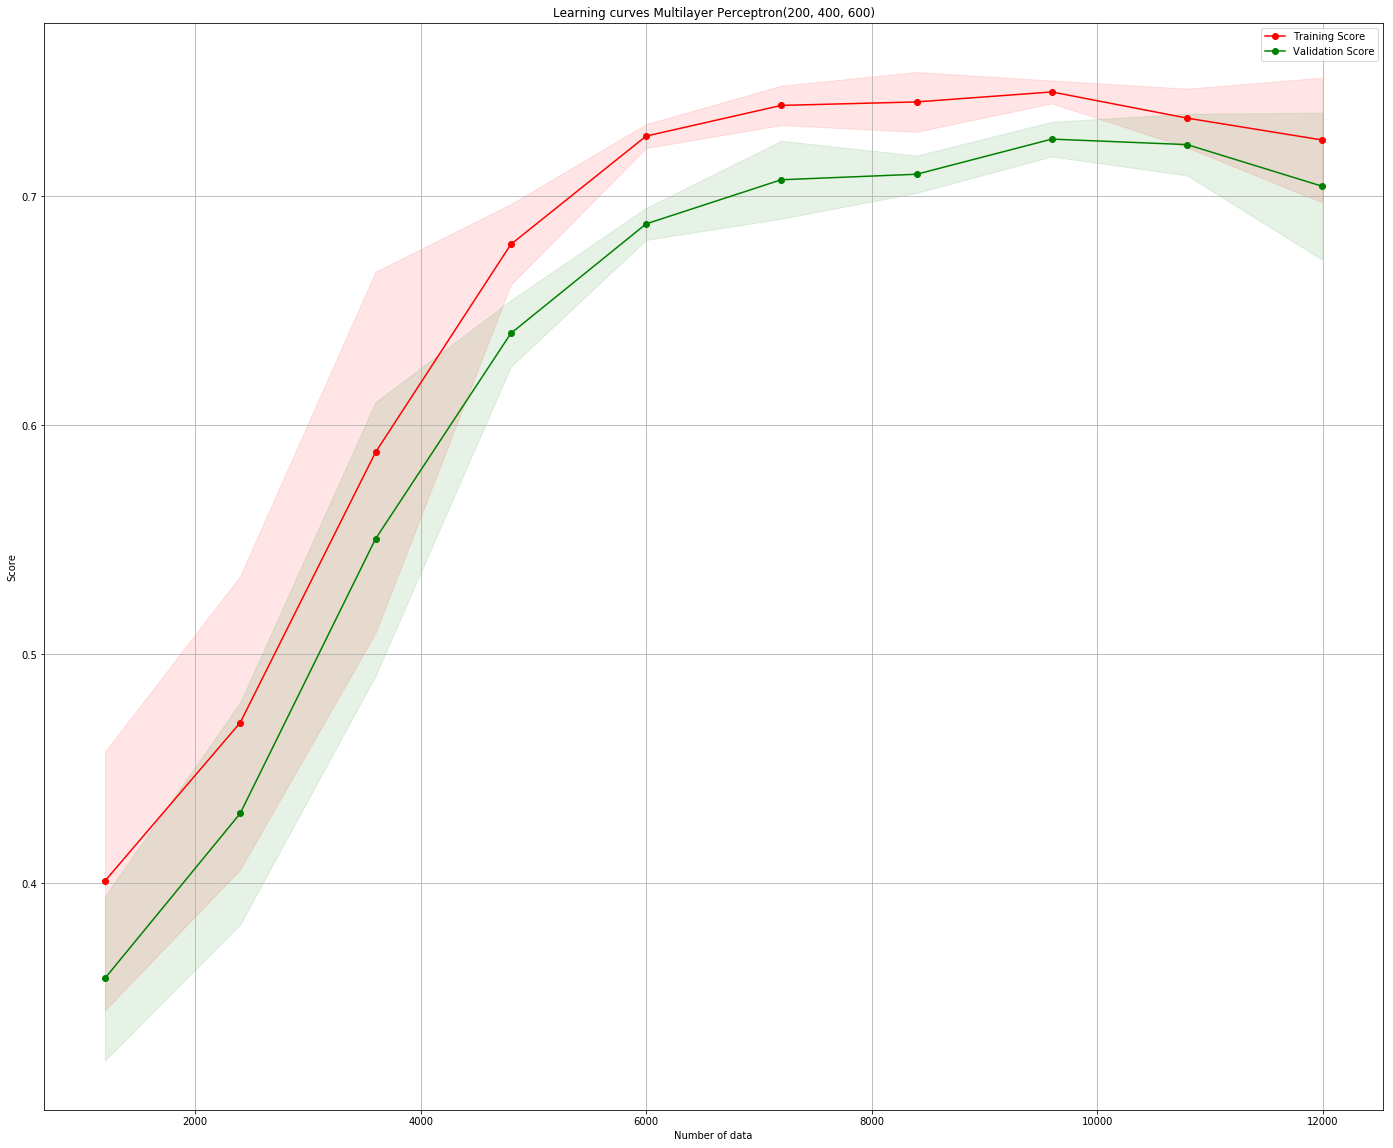

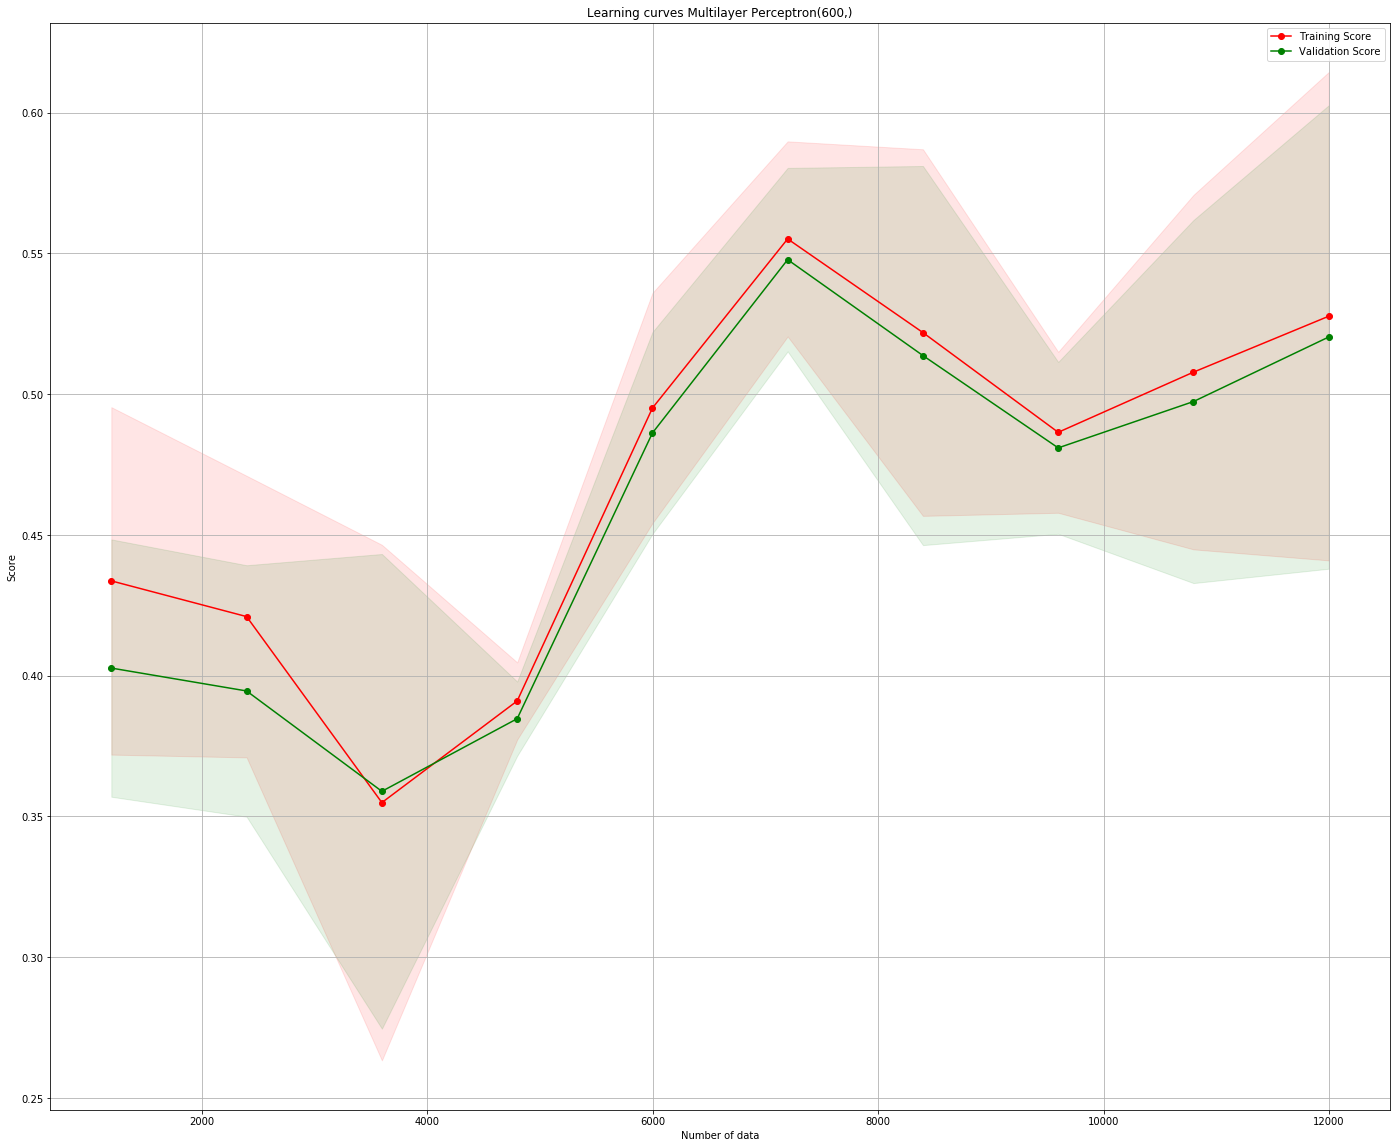

In [36]:
z=0
for specific_tuple in list_tuple:
    
    if z == 0:
        bestModel2 = bestModel2a
    if z == 1:
        bestModel2 = bestModel2b
    if z == 2:
        bestModel2 = bestModel2c
    if z == 3:
        bestModel2 = bestModel2d
    
    titleLc2 = "Learning curves Multilayer Perceptron" + str(specific_tuple)
    analyzer.plotLearningCurves(bestModel2.model, x, t, title=titleLc2)
    plt.show()
    z= z+1